# Import Modules

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import time
import os

import warnings
warnings.filterwarnings('ignore')

import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

from sklearn.decomposition import PCA
from sklearn.cluster import KMeans, DBSCAN

from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

from sklearn.metrics import confusion_matrix
from sklearn.metrics import make_scorer
from sklearn import metrics

from sklearn.model_selection import GridSearchCV

from imblearn.over_sampling import SMOTE
from imblearn.combine import SMOTEENN

from xgboost import XGBClassifier

import joblib

In [2]:
from matplotlib.colors import LinearSegmentedColormap

colors = ['red', 'white', 'blue']
cmap = LinearSegmentedColormap.from_list("Blues", colors)

In [3]:
is_deleted_cols = True

if is_deleted_cols:
    folder_name = "models_deleted_cols"
else:
    folder_name = "models_kmeans_method"

# Acquire Data

In [4]:
df_original = pd.read_csv(r"data/transaction_dataset.csv")
# df=pd.read_csv('gdrive/My Drive/Colab Notebooks/Projekt_4_wykrywanie_oszustw/transaction_dataset.csv')

# Usuwamy atrybuty 'Address', 'Index' oraz 'Unnamed: 0' ze względu na zbyt dużą liczbę wartości unikatowych

df = df_original.drop(columns=["Index", "Unnamed: 0", "Address"])

print(df_original.shape)
df_original[["Index", "Unnamed: 0", "Address"]].nunique()

(9841, 51)


Index         4729
Unnamed: 0    9841
Address       9816
dtype: int64

## Description of the columns of the dataset
* **`FLAG`** **(target column)**: whether the transaction is fraud or not
* `Avg min between sent tnx`: Average time between sent transactions for account in minutes
* `Avg_min_between_received_tnx`: Average time between received transactions for account in minutes
* `Time_Diff_between_first_and_last`(Mins): Time difference between the first and last transaction
* `Sent_tnx`: Total number of sent normal transactions
* `Received_tnx`: Total number of received normal transactions
* `Number_of_Created_Contracts`: Total Number of created contract transactions
* `Unique_Received_From_Addresses`: Total Unique addresses from which account received transactions
* `Unique_Sent_To_Addresses20`: Total Unique addresses from which account sent transactions
* `Min_Value_Received`: Minimum value in Ether ever received
* `Max_Value_Received`: Maximum value in Ether ever received
* `Avg_Value_Received`: Average value in Ether ever received
* `Min_Val_Sent`: Minimum value of Ether ever sent
* `Max_Val_Sent`: Maximum value of Ether ever sent
* `Avg_Val_Sent`: Average value of Ether ever sent
* `Min_Value_Sent_To_Contract`: Minimum value of Ether sent to a contract
* `Max_Value_Sent_To_Contract`: Maximum value of Ether sent to a contract
* `Avg_Value_Sent_To_Contract`: Average value of Ether sent to contracts
* `Total_Transactions`(Including_Tnx_to_Create_Contract): Total number of transactions
* `Total_Ether_Sent`:Total Ether sent for account address
* `Total_Ether_Received`: Total Ether received for account address
* `Total_Ether_Sent_Contracts`: Total Ether sent to Contract addresses
* `Total_Ether_Balance`: Total Ether Balance following enacted transactions
* `Total_ERC20_Tnxs`: Total number of ERC20 token transfer transactions
* `ERC20_Total_Ether_Received`: Total ERC20 token received transactions in Ether
* `ERC20_Total_Ether_Sent`: Total ERC20token sent transactions in Ether
* `ERC20_Total_Ether_Sent_Contract`: Total ERC20 token transfer to other contracts in Ether
* `ERC20_Uniq_Sent_Addr`: Number of ERC20 token transactions sent to Unique account addresses
* `ERC20_Uniq_Rec_Addr`: Number of ERC20 token transactions received from Unique addresses
* `ERC20_Uniq_Rec_Contract_Addr`: Number of ERC20token transactions received from Unique contract addresses
* `ERC20_Avg_Time_Between_Sent_Tnx`: Average time between ERC20 token sent transactions in minutes
* `ERC20_Avg_Time_Between_Rec_Tnx`: Average time between ERC20 token received transactions in minutes
* `ERC20_Avg_Time_Between_Contract_Tnx`: Average time ERC20 token between sent token transactions
* `ERC20_Min_Val_Rec`: Minimum value in Ether received from ERC20 token transactions for account
* `ERC20_Max_Val_Rec`: Maximum value in Ether received from ERC20 token transactions for account
* `ERC20_Avg_Val_Rec`: Average value in Ether received from ERC20 token transactions for account
* `ERC20_Min_Val_Sent`: Minimum value in Ether sent from ERC20 token transactions for account
* `ERC20_Max_Val_Sent`: Maximum value in Ether sent from ERC20 token transactions for account
* `ERC20_Avg_Val_Sent`: Average value in Ether sent from ERC20 token transactions for account
* `ERC20_Uniq_Sent_Token_Name`: Number of Unique ERC20 tokens transferred
* `ERC20_Uniq_Rec_Token_Name`: Number of Unique ERC20 tokens received
* `ERC20_Most_Sent_Token_Type`: Most sent token for account via ERC20 transaction

* `ERC20_Most_Rec_Token_Type`: Most received token for account via ERC20 transactions

### Target column

In [5]:
df["FLAG"].value_counts()

FLAG
0    7662
1    2179
Name: count, dtype: int64

In [6]:
df.head()

,FLAG,Avg min between sent tnx,Avg min between received tnx,Time Diff between first and last (Mins),Sent tnx,Received Tnx,Number of Created Contracts,Unique Received From Addresses,Unique Sent To Addresses,min value received,...,ERC20 min val sent,ERC20 max val sent,ERC20 avg val sent,ERC20 min val sent contract,ERC20 max val sent contract,ERC20 avg val sent contract,ERC20 uniq sent token name,ERC20 uniq rec token name,ERC20 most sent token type,ERC20_most_rec_token_type
0,0,844.26,1093.71,704785.63,721,89,0,40,118,0.000000,...,0.000000,1.683100e+07,271779.920000,0.0,0.0,0.0,39.0,57.0,Cofoundit,Numeraire
1,0,12709.07,2958.44,1218216.73,94,8,0,5,14,0.000000,...,2.260809,2.260809e+00,2.260809,0.0,0.0,0.0,1.0,7.0,Livepeer Token,Livepeer Token
2,0,246194.54,2434.02,516729.30,2,10,0,10,2,0.113119,...,0.000000,0.000000e+00,0.000000,0.0,0.0,0.0,0.0,8.0,NaN,XENON
3,0,10219.60,15785.09,397555.90,25,9,0,7,13,0.000000,...,100.000000,9.029231e+03,3804.076893,0.0,0.0,0.0,1.0,11.0,Raiden,XENON
4,0,36.61,10707.77,382472.42,4598,20,1,7,19,0.000000,...,0.000000,4.500000e+04,13726.659220,0.0,0.0,0.0,6.0,27.0,StatusNetwork,EOS


In [7]:
df.describe().round(3)

,FLAG,Avg min between sent tnx,Avg min between received tnx,Time Diff between first and last (Mins),Sent tnx,Received Tnx,Number of Created Contracts,Unique Received From Addresses,Unique Sent To Addresses,min value received,...,ERC20 max val rec,ERC20 avg val rec,ERC20 min val sent,ERC20 max val sent,ERC20 avg val sent,ERC20 min val sent contract,ERC20 max val sent contract,ERC20 avg val sent contract,ERC20 uniq sent token name,ERC20 uniq rec token name
count,9841.000,9841.000,9841.000,9841.000,9841.000,9841.000,9841.000,9841.000,9841.00,9841.000,...,9.012000e+03,9.012000e+03,9.012000e+03,9.012000e+03,9.012000e+03,9012.0,9012.0,9012.0,9012.000,9012.000
mean,0.221,5086.879,8004.851,218333.258,115.932,163.701,3.730,30.361,25.84,43.845,...,1.252524e+08,4.346203e+06,1.174126e+04,1.303594e+07,6.318389e+06,0.0,0.0,0.0,1.385,4.827
std,0.415,21486.550,23081.715,322937.926,757.226,940.837,141.446,298.621,263.82,325.929,...,1.053741e+10,2.141192e+08,1.053567e+06,1.179905e+09,5.914764e+08,0.0,0.0,0.0,6.735,16.679
min,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.00,0.000,...,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.0,0.0,0.0,0.000,0.000
25%,0.000,0.000,0.000,316.930,1.000,1.000,0.000,1.000,1.00,0.001,...,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.0,0.0,0.0,0.000,0.000
50%,0.000,17.340,509.770,46637.030,3.000,4.000,0.000,2.000,2.00,0.096,...,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.0,0.0,0.0,0.000,1.000
75%,0.000,565.470,5480.390,304070.980,11.000,27.000,0.000,5.000,3.00,2.000,...,9.900000e+01,2.946500e+01,0.000000e+00,0.000000e+00,0.000000e+00,0.0,0.0,0.0,0.000,2.000
max,1.000,430287.670,482175.490,1954860.950,10000.000,10000.000,9995.000,9999.000,9287.00,10000.000,...,1.000000e+12,1.724181e+10,1.000000e+08,1.120000e+11,5.614756e+10,0.0,0.0,0.0,213.000,737.000


In [8]:
df.describe(include="object")

,ERC20 most sent token type,ERC20_most_rec_token_type
count,7144,8970
unique,304,466
top,0,0
freq,4399,4399


# Dealing with Nulls, duplicates

We see that all rows that have nan values are fraudulent, what to do:
* delete (but the collection will be even more unbalanced).
* fill in with one value (but this will greatly disturb the values of one class).
* fill in randomly (but eventually the information about the fraud class will be able to strongly miss the real thing, the result - bad performance on the test set).
* do regression (I do not see the downside so far).
* clustering and then determining values based on centroids.

##### Technical change

In [9]:
df.columns = [col.strip() for col in df.columns]

In [10]:
df[df.duplicated(keep='first')].FLAG.value_counts()

FLAG
1    523
0     23
Name: count, dtype: int64

In [11]:
df = df.drop_duplicates(keep="first")

In [12]:
np.where(df["FLAG"] == 1)[0]

array([7639, 7640, 7641, ..., 9292, 9293, 9294], dtype=int64)

In [13]:
(df["FLAG"] == 1).index

Index([   0,    1,    2,    3,    4,    5,    6,    7,    8,    9,
       ...
       9829, 9830, 9831, 9832, 9834, 9835, 9836, 9838, 9839, 9840],
      dtype='int64', length=9295)

In [14]:
df.isnull().sum()[df.isnull().sum() > 0]

Total ERC20 tnxs                        549
ERC20 total Ether received              549
ERC20 total ether sent                  549
ERC20 total Ether sent contract         549
ERC20 uniq sent addr                    549
ERC20 uniq rec addr                     549
ERC20 uniq sent addr.1                  549
ERC20 uniq rec contract addr            549
ERC20 avg time between sent tnx         549
ERC20 avg time between rec tnx          549
ERC20 avg time between rec 2 tnx        549
ERC20 avg time between contract tnx     549
ERC20 min val rec                       549
ERC20 max val rec                       549
ERC20 avg val rec                       549
ERC20 min val sent                      549
ERC20 max val sent                      549
ERC20 avg val sent                      549
ERC20 min val sent contract             549
ERC20 max val sent contract             549
ERC20 avg val sent contract             549
ERC20 uniq sent token name              549
ERC20 uniq rec token name       

In [17]:
df

,FLAG,Avg min between sent tnx,Avg min between received tnx,Time Diff between first and last (Mins),Sent tnx,Received Tnx,Number of Created Contracts,Unique Received From Addresses,Unique Sent To Addresses,min value received,...,ERC20 min val sent,ERC20 max val sent,ERC20 avg val sent,ERC20 min val sent contract,ERC20 max val sent contract,ERC20 avg val sent contract,ERC20 uniq sent token name,ERC20 uniq rec token name,ERC20 most sent token type,ERC20_most_rec_token_type
0,0,844.26,1093.71,704785.63,721,89,0,40,118,0.000000,...,0.000000,1.683100e+07,271779.920000,0.0,0.0,0.0,39.0,57.0,Cofoundit,Numeraire
1,0,12709.07,2958.44,1218216.73,94,8,0,5,14,0.000000,...,2.260809,2.260809e+00,2.260809,0.0,0.0,0.0,1.0,7.0,Livepeer Token,Livepeer Token
2,0,246194.54,2434.02,516729.30,2,10,0,10,2,0.113119,...,0.000000,0.000000e+00,0.000000,0.0,0.0,0.0,0.0,8.0,NaN,XENON
3,0,10219.60,15785.09,397555.90,25,9,0,7,13,0.000000,...,100.000000,9.029231e+03,3804.076893,0.0,0.0,0.0,1.0,11.0,Raiden,XENON
4,0,36.61,10707.77,382472.42,4598,20,1,7,19,0.000000,...,0.000000,4.500000e+04,13726.659220,0.0,0.0,0.0,6.0,27.0,StatusNetwork,EOS
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9835,1,0.00,0.00,8427.92,0,1,1,1,0,0.000000,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9836,1,12635.10,631.39,58748.48,4,13,0,11,4,0.004082,...,0.000000,0.000000e+00,0.000000,0.0,0.0,0.0,0.0,2.0,,GSENetwork
9838,1,2499.44,2189.29,261601.88,67,43,0,31,44,0.001078,...,0.000000,0.000000e+00,0.000000,0.0,0.0,0.0,0.0,5.0,,Free BOB Tokens - BobsRepair.com
9839,1,0.00,0.00,0.00,0,1,0,1,0,0.500000,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


## Nulls

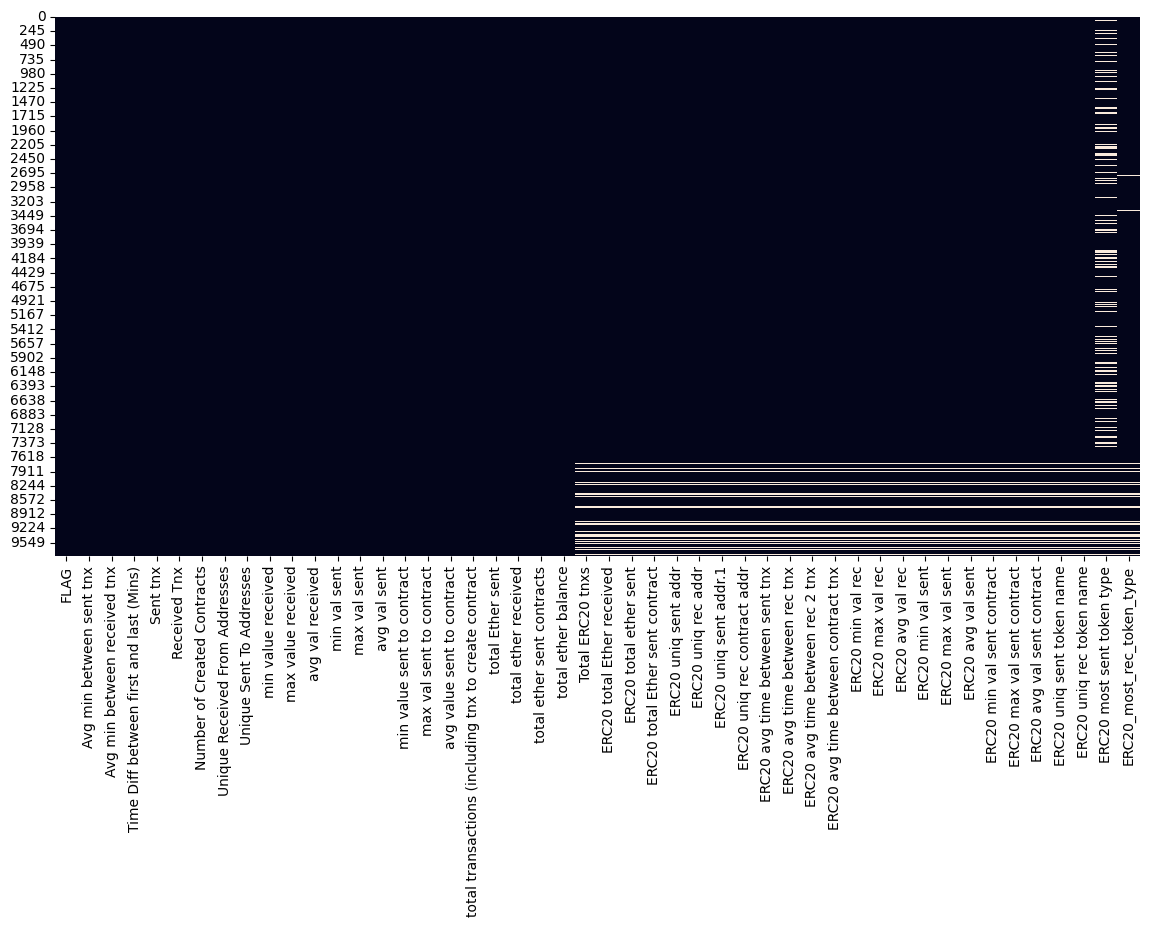

In [18]:
plt.figure(figsize=(14,7))
sns.heatmap(df.isnull(), cbar=False)
plt.show()

### ERC20 most sent token type, ERC20_most_rec_token_type

In [19]:
valids = df[["ERC20 most sent token type", "ERC20_most_rec_token_type"]]
valids.columns = [
    "valid_ERC20_mstt",
    "valid_ERC20_mrtt"
]
df = df.drop(columns=["ERC20 most sent token type", "ERC20_most_rec_token_type"])

In [20]:
valids[["valid_ERC20_mstt"]].value_counts()

valid_ERC20_mstt
0                   4383
                     948
EOS                  138
OmiseGO              136
Golem                129
                    ... 
Nebulas                1
Nexium                 1
CultureVirtue          1
Not                    1
LEADCOIN               1
Name: count, Length: 304, dtype: int64

In [21]:
valids[["valid_ERC20_mrtt"]].value_counts()

valid_ERC20_mrtt     
0                        4383
OmiseGO                   870
Blockwell say NOTSAFU     539
DATAcoin                  358
Livepeer Token            205
                         ... 
GECoin                      1
Fysical                     1
FundRequest                 1
Freyr Coin                  1
yocoinclassic               1
Name: count, Length: 466, dtype: int64

In [22]:
def change_to_binary(s):
    if s in ['None', None, ' ', '0']:
        return 0
    return 1

In [23]:
valids = valids.applymap(change_to_binary)

In [24]:
valids["valid_ERC20_mrtt"].value_counts()

valid_ERC20_mrtt
1    4891
0    4404
Name: count, dtype: int64

In [25]:
valids["valid_ERC20_mstt"].value_counts()

valid_ERC20_mstt
0    5331
1    3964
Name: count, dtype: int64

In [26]:
df[valids.columns] = valids

#### df_with_nulls 

In [27]:
df_wn = df.copy()

### Delete columns with null values

In [28]:
df = df.drop(columns=[col for col in df.columns if df[col].isna().sum() > 0])

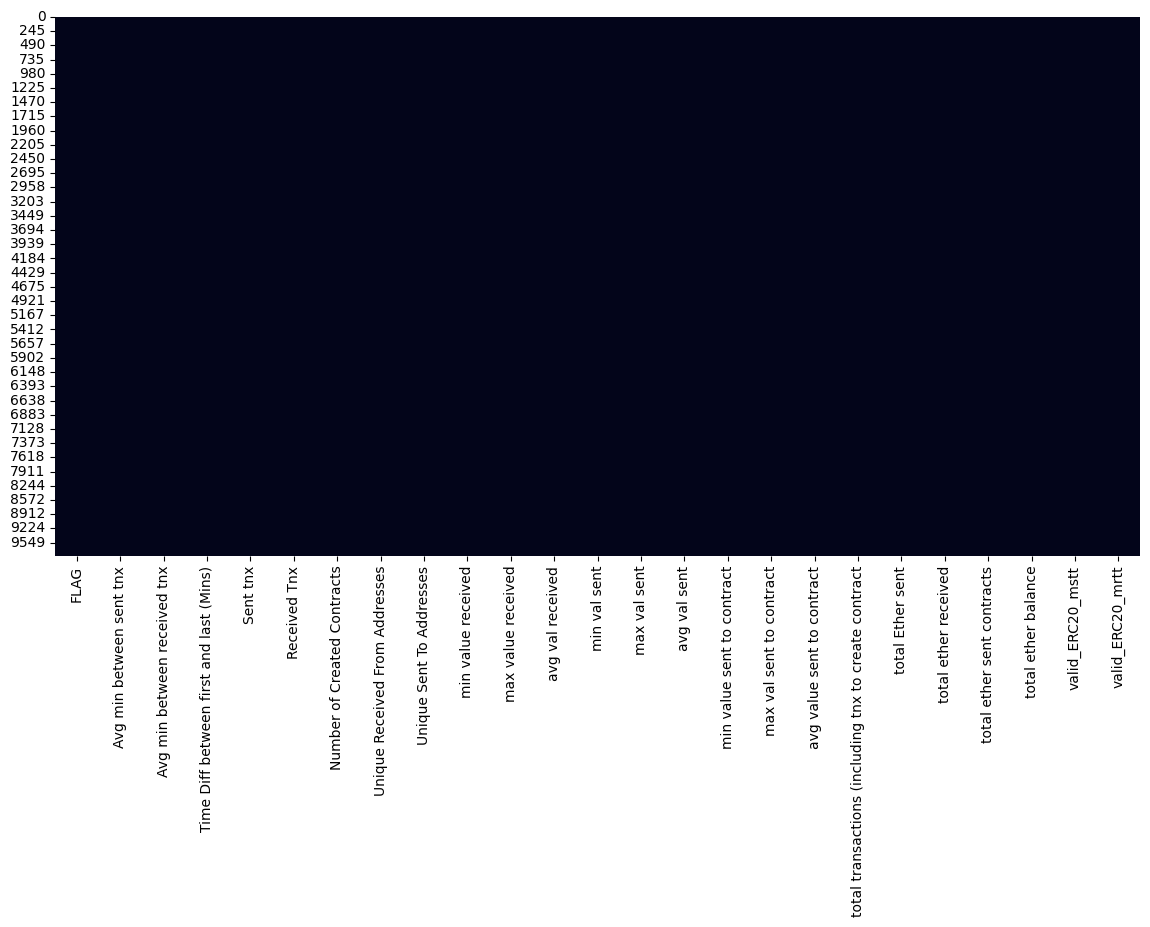

In [29]:
plt.figure(figsize=(14,7))
sns.heatmap(df.isnull(), cbar=False)
plt.show()

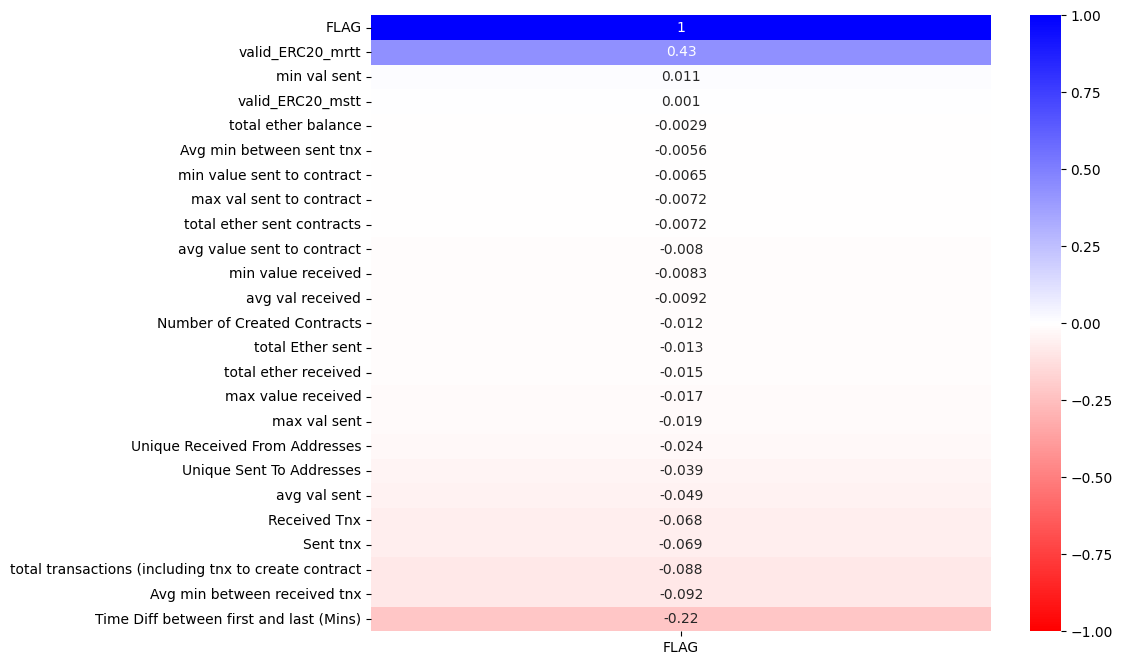

In [30]:
plt.figure(figsize=(10, 8))
sns.heatmap(df.corr()[["FLAG"]].sort_values(by="FLAG", ascending=False), cmap=cmap, vmin=-1, vmax=1, annot=True)
plt.show()

### Save Cleaned Data with deleted columns

In [32]:
if is_deleted_cols:
    path = folder_name + "\data_cleaned_1.csv"
    if not os.path.exists(path):
        df.to_csv(path)

### Fill nulls (KMeans)

We have:
* rows_cols - columns without nulls
* nan_rows_nan_cols - columns with nulls.
* rows_all_cols - rows without nulls.
* nan_rows_all_cols - rows with nulls.

What we do:
1. select numeric columns without NaN & rows without NaN
2. group the filtered data (KMeans)
3. assign rows with NaN to groups
4. make up the NaNs in the rows using the centroids of the groups they are in

In [34]:
df_wn.head()

,FLAG,Avg min between sent tnx,Avg min between received tnx,Time Diff between first and last (Mins),Sent tnx,Received Tnx,Number of Created Contracts,Unique Received From Addresses,Unique Sent To Addresses,min value received,...,ERC20 min val sent,ERC20 max val sent,ERC20 avg val sent,ERC20 min val sent contract,ERC20 max val sent contract,ERC20 avg val sent contract,ERC20 uniq sent token name,ERC20 uniq rec token name,valid_ERC20_mstt,valid_ERC20_mrtt
0,0,844.26,1093.71,704785.63,721,89,0,40,118,0.000000,...,0.000000,1.683100e+07,271779.920000,0.0,0.0,0.0,39.0,57.0,1,1
1,0,12709.07,2958.44,1218216.73,94,8,0,5,14,0.000000,...,2.260809,2.260809e+00,2.260809,0.0,0.0,0.0,1.0,7.0,1,1
2,0,246194.54,2434.02,516729.30,2,10,0,10,2,0.113119,...,0.000000,0.000000e+00,0.000000,0.0,0.0,0.0,0.0,8.0,1,1
3,0,10219.60,15785.09,397555.90,25,9,0,7,13,0.000000,...,100.000000,9.029231e+03,3804.076893,0.0,0.0,0.0,1.0,11.0,1,1
4,0,36.61,10707.77,382472.42,4598,20,1,7,19,0.000000,...,0.000000,4.500000e+04,13726.659220,0.0,0.0,0.0,6.0,27.0,1,1


In [36]:
not_null_cols = df_wn.columns[~df_wn.isnull().any(axis=0)]
not_null_rows = df_wn.index[~df_wn.isnull().any(axis=1)]

null_cols = df_wn.columns[df_wn.isnull().any(axis=0)]
null_rows = df_wn.index[df_wn.isnull().any(axis=1)]

print(null_cols)

Index(['Total ERC20 tnxs', 'ERC20 total Ether received',
       'ERC20 total ether sent', 'ERC20 total Ether sent contract',
       'ERC20 uniq sent addr', 'ERC20 uniq rec addr', 'ERC20 uniq sent addr.1',
       'ERC20 uniq rec contract addr', 'ERC20 avg time between sent tnx',
       'ERC20 avg time between rec tnx', 'ERC20 avg time between rec 2 tnx',
       'ERC20 avg time between contract tnx', 'ERC20 min val rec',
       'ERC20 max val rec', 'ERC20 avg val rec', 'ERC20 min val sent',
       'ERC20 max val sent', 'ERC20 avg val sent',
       'ERC20 min val sent contract', 'ERC20 max val sent contract',
       'ERC20 avg val sent contract', 'ERC20 uniq sent token name',
       'ERC20 uniq rec token name'],
      dtype='object')


In [37]:
def find_best_k(data, kmax):
    scaler = StandardScaler()
    data = scaler.fit_transform(data)
    
    l = []
    for k in range(1, kmax+1):
        kmeans = KMeans(n_clusters=k, random_state=0).fit(data)
        centers = kmeans.cluster_centers_
        pred_clusters = kmeans.predict(data)
        
        l.append(np.sum((data - centers[pred_clusters])**2))
    return l

In [38]:
kmax = 40
elbow = find_best_k(df_wn.loc[not_null_rows, not_null_cols], kmax)

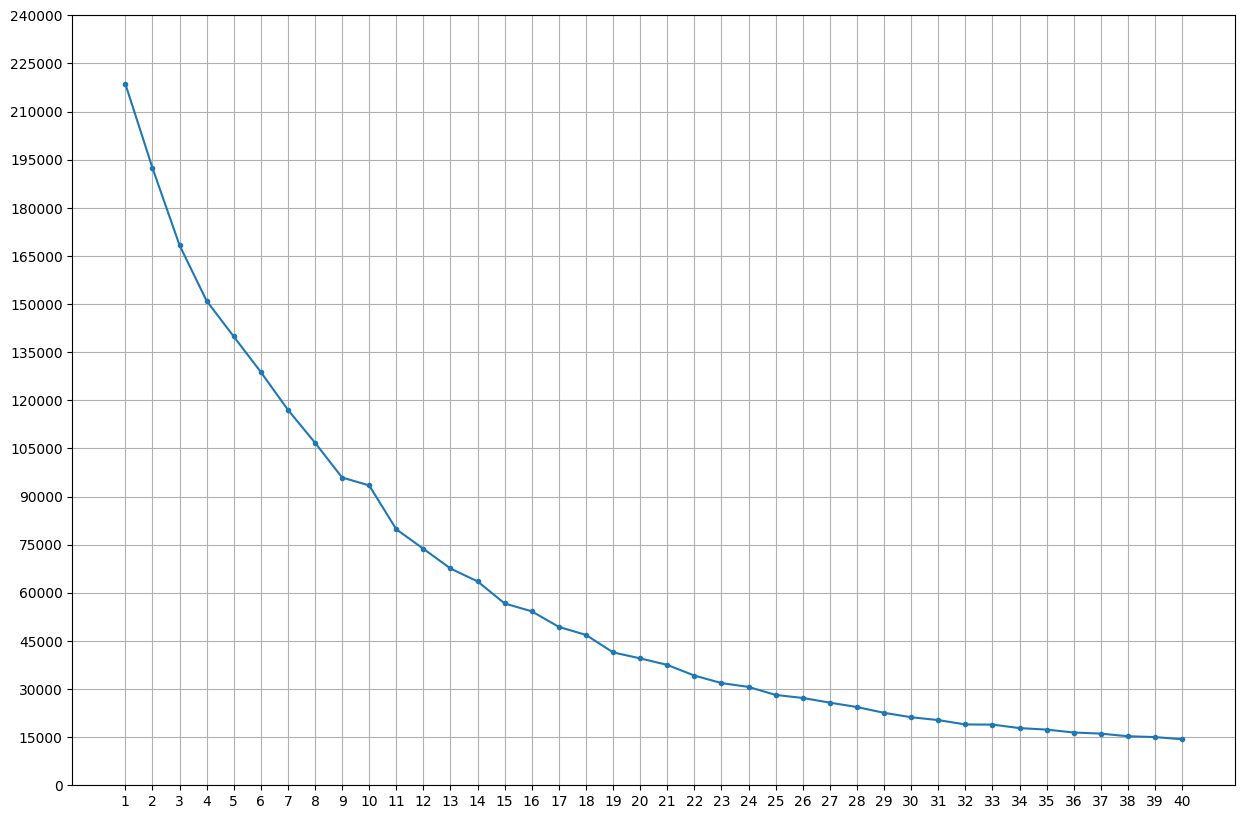

In [39]:
plt.figure(figsize=(15, 10))
plt.plot(range(1, kmax+1), elbow, ".-")
plt.xticks(range(1, kmax+1))
plt.yticks(range(0, 240_001, 15_000))
plt.grid()
plt.show()

In [40]:
best_k = 40
kmeans = KMeans(n_clusters=best_k, random_state=0).fit(df_wn.loc[not_null_rows, not_null_cols])

In [41]:
preds = kmeans.predict(df_wn[not_null_cols])

In [42]:
gr_lens = []
gr_null_lens = []
groups = []

for i in range(best_k):
    ind_i = np.where(preds == i)[0]
    gr_lens.append(len(ind_i))
    gr_null_lens.append(np.intersect1d(ind_i, null_rows).shape[0])
    if len(ind_i) < 20:
        groups.append(i)

print(gr_lens)
print(gr_null_lens)
print(sum(gr_null_lens))
print(groups)

[768, 111, 1, 1, 1, 2, 261, 1, 902, 27, 1, 2, 210, 1, 1, 41, 2, 275, 5, 347, 1, 597, 624, 1, 1, 1, 1, 240, 168, 19, 1, 217, 40, 25, 4183, 76, 1, 59, 70, 10]
[57, 0, 0, 0, 0, 0, 5, 0, 34, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 7, 0, 26, 18, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 248, 2, 0, 0, 0, 0]
398
[2, 3, 4, 5, 7, 10, 11, 13, 14, 16, 18, 20, 23, 24, 25, 26, 29, 30, 36, 39]


In [43]:
preds = np.array([label if label not in groups else -1 for label in preds])
list(preds).count(-1)

54

In [44]:
df_wn["Group"] = preds

In [45]:
means = df_wn.loc[not_null_rows, list(null_cols)+["Group"]].groupby("Group").mean()
means = means.drop(index=[-1])
means

,Total ERC20 tnxs,ERC20 total Ether received,ERC20 total ether sent,ERC20 total Ether sent contract,ERC20 uniq sent addr,ERC20 uniq rec addr,ERC20 uniq sent addr.1,ERC20 uniq rec contract addr,ERC20 avg time between sent tnx,ERC20 avg time between rec tnx,...,ERC20 max val rec,ERC20 avg val rec,ERC20 min val sent,ERC20 max val sent,ERC20 avg val sent,ERC20 min val sent contract,ERC20 max val sent contract,ERC20 avg val sent contract,ERC20 uniq sent token name,ERC20 uniq rec token name
Group,,,,,,,,,,,,,,,,,,,,,
0,19.728650,5.677300e+07,4.947181e+05,5.794854e+02,2.838843,4.994490,0.015152,2.768595,0.0,0.0,...,5.174708e+07,1.546306e+07,311.445461,4.399780e+05,1.110844e+04,0.0,0.0,0.0,0.694215,2.739669
1,111.360360,1.399973e+08,1.125595e+07,9.099099e-09,17.342342,28.117117,0.018018,19.549550,0.0,0.0,...,1.152092e+08,3.040326e+07,27.937306,2.209297e+06,6.289369e+04,0.0,0.0,0.0,6.126126,19.153153
6,63.393822,2.827843e+06,2.736467e+06,4.092664e-15,11.714286,12.864865,0.003861,9.069498,0.0,0.0,...,1.473790e+06,3.551497e+04,119.400756,6.995830e+05,3.464536e+04,0.0,0.0,0.0,2.308880,8.938224
8,9.530233,1.896525e+06,7.548906e+04,0.000000e+00,1.400000,3.734884,0.000000,2.902326,0.0,0.0,...,1.861479e+06,3.269541e+04,140.333796,6.403175e+04,1.230322e+03,0.0,0.0,0.0,0.686047,2.884884
9,11.037037,2.855281e+05,1.236873e+03,0.000000e+00,0.703704,7.259259,0.000000,9.074074,0.0,0.0,...,2.326940e+05,3.139694e+04,124.766877,1.019964e+03,4.351596e+02,0.0,0.0,0.0,0.629630,9.037037
12,111.838095,2.771176e+06,1.455346e+06,0.000000e+00,9.623810,15.114286,0.000000,12.485714,0.0,0.0,...,1.571250e+06,1.052338e+05,22.815441,5.569243e+05,5.734710e+04,0.0,0.0,0.0,3.376190,12.295238
15,22.073171,2.458278e+10,8.957013e+04,0.000000e+00,2.463415,10.975610,0.000000,12.829268,0.0,0.0,...,2.458221e+10,4.735036e+08,150.303151,4.349551e+04,6.270906e+03,0.0,0.0,0.0,2.121951,12.682927
17,192.792727,1.012300e+08,6.413363e+06,2.043782e-07,29.003636,38.385455,0.007273,27.952727,0.0,0.0,...,8.653868e+07,7.781004e+06,1848.874796,2.503573e+06,6.074308e+04,0.0,0.0,0.0,10.436364,27.472727
19,18.020349,5.580549e+06,2.250971e+05,0.000000e+00,3.380814,7.869186,0.000000,7.116279,0.0,0.0,...,5.450199e+06,2.346959e+06,97.332872,1.321288e+05,3.071350e+04,0.0,0.0,0.0,1.694767,7.046512


In [46]:
filled_na = df_wn.loc[null_rows, list(null_cols)+["Group"]].join(means, on="Group", lsuffix="_to_del")
filled_na = filled_na.drop(columns=[col for col in filled_na.columns if "_to_del" in col or col == "Group"])
filled_na.head()

,Total ERC20 tnxs,ERC20 total Ether received,ERC20 total ether sent,ERC20 total Ether sent contract,ERC20 uniq sent addr,ERC20 uniq rec addr,ERC20 uniq sent addr.1,ERC20 uniq rec contract addr,ERC20 avg time between sent tnx,ERC20 avg time between rec tnx,...,ERC20 max val rec,ERC20 avg val rec,ERC20 min val sent,ERC20 max val sent,ERC20 avg val sent,ERC20 min val sent contract,ERC20 max val sent contract,ERC20 avg val sent contract,ERC20 uniq sent token name,ERC20 uniq rec token name
7662,3.849077,2.603804e+06,2.962071e+07,1.085745,1.795515,0.703958,0.001055,0.73219,0.0,0.0,...,1.258433e+06,37297.851458,26869.843567,2.959792e+07,1.481686e+07,0.0,0.0,0.0,0.182586,0.723483
7666,3.849077,2.603804e+06,2.962071e+07,1.085745,1.795515,0.703958,0.001055,0.73219,0.0,0.0,...,1.258433e+06,37297.851458,26869.843567,2.959792e+07,1.481686e+07,0.0,0.0,0.0,0.182586,0.723483
7675,3.849077,2.603804e+06,2.962071e+07,1.085745,1.795515,0.703958,0.001055,0.73219,0.0,0.0,...,1.258433e+06,37297.851458,26869.843567,2.959792e+07,1.481686e+07,0.0,0.0,0.0,0.182586,0.723483
7676,3.849077,2.603804e+06,2.962071e+07,1.085745,1.795515,0.703958,0.001055,0.73219,0.0,0.0,...,1.258433e+06,37297.851458,26869.843567,2.959792e+07,1.481686e+07,0.0,0.0,0.0,0.182586,0.723483
7678,3.849077,2.603804e+06,2.962071e+07,1.085745,1.795515,0.703958,0.001055,0.73219,0.0,0.0,...,1.258433e+06,37297.851458,26869.843567,2.959792e+07,1.481686e+07,0.0,0.0,0.0,0.182586,0.723483


In [47]:
df_wn.loc[filled_na.index, filled_na.columns] = filled_na
df_wn = df_wn.dropna()
df_wn = df_wn.drop(columns=["Group"])

### Save Cleaned Data with kmeans 

In [48]:
if not is_deleted_cols:
    path = folder_name + "\data_cleaned_1.csv"
    if not os.path.exists(path):
        df_wn.to_csv(path)

# CheckPoint

In [49]:
if not is_deleted_cols:
    df = df_wn.copy()

## Standardizing Data

Let $(X_n)$ be a sequence of random variables with the same distribution, having mean $\mu$ and variance $\sigma^2$. The standardization is given by the following formula:

$$
\forall_{i \in \{1, \dots, n\}} \hat{X_i} := \frac{X_i - \mu}{\sigma}
$$

which returns the standardized random variables.
iables.


In [50]:
def standardize(df):
    return (df-df.mean())/df.std()

In [51]:
y = df["FLAG"]
X = df.drop(columns="FLAG")

In [52]:
df_standardized = df.copy()
df_standardized[df.drop(columns="FLAG").columns] = standardize(df.drop(columns="FLAG"))
df_standardized.head()

,FLAG,Avg min between sent tnx,Avg min between received tnx,Time Diff between first and last (Mins),Sent tnx,Received Tnx,Number of Created Contracts,Unique Received From Addresses,Unique Sent To Addresses,min value received,...,min value sent to contract,max val sent to contract,avg value sent to contract,total transactions (including tnx to create contract,total Ether sent,total ether received,total ether sent contracts,total ether balance,valid_ERC20_mstt,valid_ERC20_mrtt
0,0,-0.205576,-0.311585,1.446605,0.768470,-0.087142,-0.027127,0.025611,0.334077,-0.138054,...,-0.013917,-0.015411,-0.017138,0.367038,-0.026826,-0.031312,-0.015411,-0.007390,1.159616,0.948859
1,0,0.331960,-0.232781,3.013739,-0.036820,-0.170887,-0.027127,-0.088331,-0.049147,-0.138054,...,-0.013917,-0.015411,-0.017138,-0.142399,-0.029166,-0.032869,-0.015411,-0.006271,1.159616,0.948859
2,0,10.910034,-0.254943,0.872605,-0.154980,-0.168820,-0.027127,-0.072054,-0.093366,-0.137717,...,-0.013917,-0.015411,-0.017138,-0.207158,-0.029164,-0.032868,-0.015411,-0.006271,1.159616,0.948859
3,0,0.219174,0.309277,0.508855,-0.125440,-0.169853,-0.027127,-0.081820,-0.052832,-0.138054,...,-0.013917,-0.015411,-0.017138,-0.191328,-0.024428,-0.030488,-0.015411,-0.009697,1.159616,0.948859
4,0,-0.242167,0.094708,0.462816,5.747908,-0.158481,-0.020256,-0.081820,-0.030723,-0.138054,...,-0.013917,-0.015411,-0.017138,3.107779,-0.028891,-0.032735,-0.015411,-0.006475,1.159616,0.948859


In [53]:
df_standardized.describe().round(3)

,FLAG,Avg min between sent tnx,Avg min between received tnx,Time Diff between first and last (Mins),Sent tnx,Received Tnx,Number of Created Contracts,Unique Received From Addresses,Unique Sent To Addresses,min value received,...,min value sent to contract,max val sent to contract,avg value sent to contract,total transactions (including tnx to create contract,total Ether sent,total ether received,total ether sent contracts,total ether balance,valid_ERC20_mstt,valid_ERC20_mrtt
count,9295.000,9295.000,9295.000,9295.000,9295.000,9295.000,9295.000,9295.000,9295.000,9295.000,...,9295.000,9295.000,9295.000,9295.000,9295.000,9295.000,9295.000,9295.000,9295.000,9295.000
mean,0.178,-0.000,-0.000,0.000,-0.000,0.000,-0.000,-0.000,-0.000,0.000,...,0.000,-0.000,-0.000,-0.000,0.000,0.000,0.000,0.000,0.000,0.000
std,0.383,1.000,1.000,1.000,1.000,1.000,1.000,1.000,1.000,1.000,...,1.000,1.000,1.000,1.000,1.000,1.000,1.000,1.000,1.000,1.000
min,0.000,-0.244,-0.358,-0.705,-0.158,-0.179,-0.027,-0.105,-0.101,-0.138,...,-0.014,-0.015,-0.017,-0.216,-0.029,-0.033,-0.015,-62.567,-0.862,-1.054
25%,0.000,-0.244,-0.358,-0.704,-0.156,-0.177,-0.027,-0.101,-0.097,-0.138,...,-0.014,-0.015,-0.017,-0.213,-0.029,-0.033,-0.015,-0.006,-0.862,-1.054
50%,0.000,-0.243,-0.324,-0.498,-0.154,-0.174,-0.027,-0.098,-0.093,-0.138,...,-0.014,-0.015,-0.017,-0.209,-0.029,-0.033,-0.015,-0.006,-0.862,0.949
75%,0.000,-0.206,-0.102,0.270,-0.142,-0.149,-0.027,-0.088,-0.090,-0.130,...,-0.014,-0.015,-0.017,-0.170,-0.029,-0.033,-0.015,-0.006,1.160,0.949
max,1.000,19.250,20.019,5.262,12.686,10.160,68.649,32.447,34.120,29.704,...,86.222,86.710,69.136,14.171,77.491,76.238,86.709,57.276,1.160,0.949


# Outliers

## Detect

In [54]:
def Z_method(df, feature, k=3):
    attr = df[feature]
    mean = attr.mean()
    var = attr.var()
    return df[(attr > mean + k * var) | (attr < mean - k * var)].index

In [55]:
outliers_df_pos=[]
outliers_df_counts=[]
flag_count = []

for column in df_standardized.drop(columns="FLAG").columns:
    t = Z_method(df_standardized, column, 5)
    outliers_df_pos.append(t)
    outliers_df_counts.append(len(t))
    flags = df_standardized.loc[t, "FLAG"].value_counts()
    if 1 in flags.index:
        flag_count.append(flags.loc[1])
    else:
        flag_count.append(0)

In [56]:
outliers = pd.DataFrame(
    index=df_standardized.drop(columns="FLAG").columns,
    data={
        "outlier_count": outliers_df_counts,
        "fraud_count": flag_count
    }
)
outliers

,outlier_count,fraud_count
Avg min between sent tnx,84,11
Avg min between received tnx,91,3
Time Diff between first and last (Mins),7,0
Sent tnx,83,0
Received Tnx,97,1
Number of Created Contracts,9,0
Unique Received From Addresses,54,2
Unique Sent To Addresses,47,0
min value received,18,7
max value received,9,0


## Delete

In [57]:
outliers = []

for arr in outliers_df_pos:
    for el in arr:
        if el not in outliers:
            outliers.append(el)
len(outliers)

391

In [58]:
df.loc[outliers]["FLAG"].value_counts()

FLAG
0    366
1     25
Name: count, dtype: int64

In [59]:
df = df.drop(labels=outliers)
df = df.reset_index(drop=True)

df_standardized = df_standardized.drop(labels=outliers)
df_standardized = df_standardized.reset_index(drop=True)

In [60]:
df.describe().round(3)

,FLAG,Avg min between sent tnx,Avg min between received tnx,Time Diff between first and last (Mins),Sent tnx,Received Tnx,Number of Created Contracts,Unique Received From Addresses,Unique Sent To Addresses,min value received,...,min value sent to contract,max val sent to contract,avg value sent to contract,total transactions (including tnx to create contract,total Ether sent,total ether received,total ether sent contracts,total ether balance,valid_ERC20_mstt,valid_ERC20_mrtt
count,8904.000,8904.000,8904.000,8904.000,8904.000,8904.000,8904.000,8904.000,8904.000,8904.000,...,8904.0,8904.0,8904.0,8904.000,8904.000,8904.000,8904.0,8904.000,8904.000,8904.000
mean,0.183,3761.004,6849.374,217666.388,48.367,69.896,0.153,7.978,7.722,34.963,...,0.0,0.0,0.0,118.417,596.813,635.079,0.0,38.266,0.415,0.517
std,0.387,12244.729,15244.864,317559.507,207.377,271.762,0.582,41.624,36.144,129.168,...,0.0,0.0,0.0,424.223,5896.974,6020.847,0.0,1544.912,0.493,0.500
min,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,...,0.0,0.0,0.0,0.000,0.000,0.000,0.0,-22043.456,0.000,0.000
25%,0.000,0.000,0.000,324.722,1.000,2.000,0.000,1.000,1.000,0.005,...,0.0,0.0,0.0,4.000,0.785,4.546,0.0,0.001,0.000,0.000
50%,0.000,21.360,846.030,55230.925,3.000,5.000,0.000,2.000,2.000,0.108,...,0.0,0.0,0.0,9.000,17.497,36.963,0.0,0.002,0.000,1.000
75%,0.000,739.762,5904.442,299789.488,11.000,28.000,0.000,5.000,3.000,3.000,...,0.0,0.0,0.0,55.000,100.999,101.000,0.0,0.053,1.000,1.000
max,1.000,115241.500,126509.980,1853832.950,3498.000,4736.000,41.000,1471.000,1275.000,1488.581,...,0.0,0.0,0.0,7233.000,242277.831,242277.910,0.0,115572.243,1.000,1.000


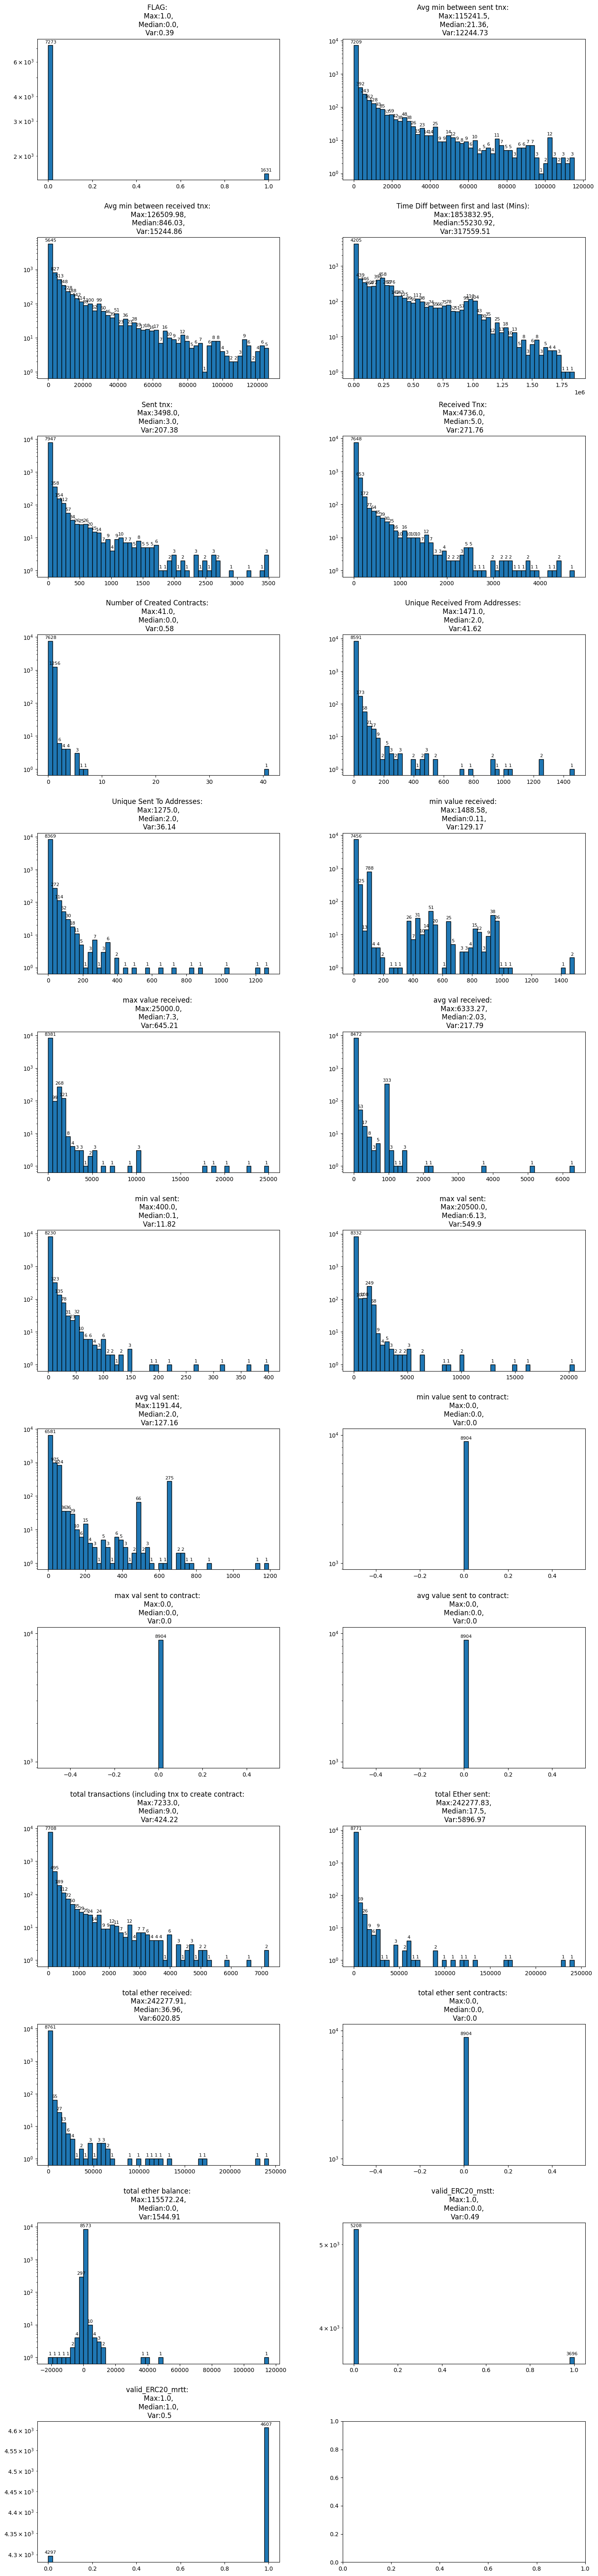

In [61]:
ncols = df.shape[1]
medians = round(df.median(), 2)
maxes = round(df.max(), 2)
std = round(df.std(), 2)

fig, ax = plt.subplots(ncols//2+1, 2, figsize=(16, 64))
fig.tight_layout(pad=8)

for i in range(ncols):
    plt.subplot(ncols//2+1, 2, i+1)
    title = f"{df.columns[i]}: \n Max:{maxes[i]}, \n Median:{medians[i]}, \n Var:{std[i]}"
    plt.title(title)
    values, bins, bars = plt.hist(df[df.columns[i]], log=True, bins=50, edgecolor="black", )
    plt.bar_label(bars, fontsize=8, padding=2)
    plt.ylim(bottom=0)

plt.show()

### Zero variance columns

In [62]:
zero_var_cols = df.var()[df.var() == 0].index
zero_var_cols

Index(['min value sent to contract', 'max val sent to contract',
       'avg value sent to contract', 'total ether sent contracts'],
      dtype='object')

In [63]:
df = df.drop(columns=zero_var_cols)
df_standardized = df_standardized.drop(columns=zero_var_cols)

# Cleaned data analysis

## Correlation

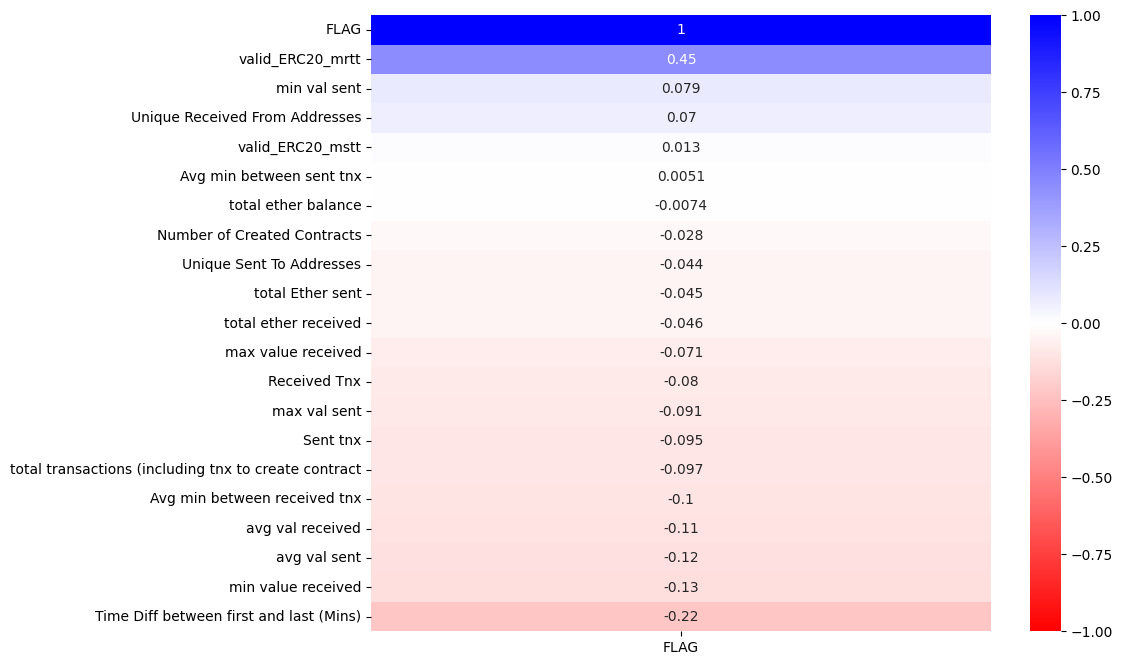

In [64]:
plt.figure(figsize=(10, 8))
sns.heatmap(df.corr()[["FLAG"]].sort_values(by="FLAG", ascending=False), cmap=cmap, vmin=-1, vmax=1, annot=True)
plt.show()

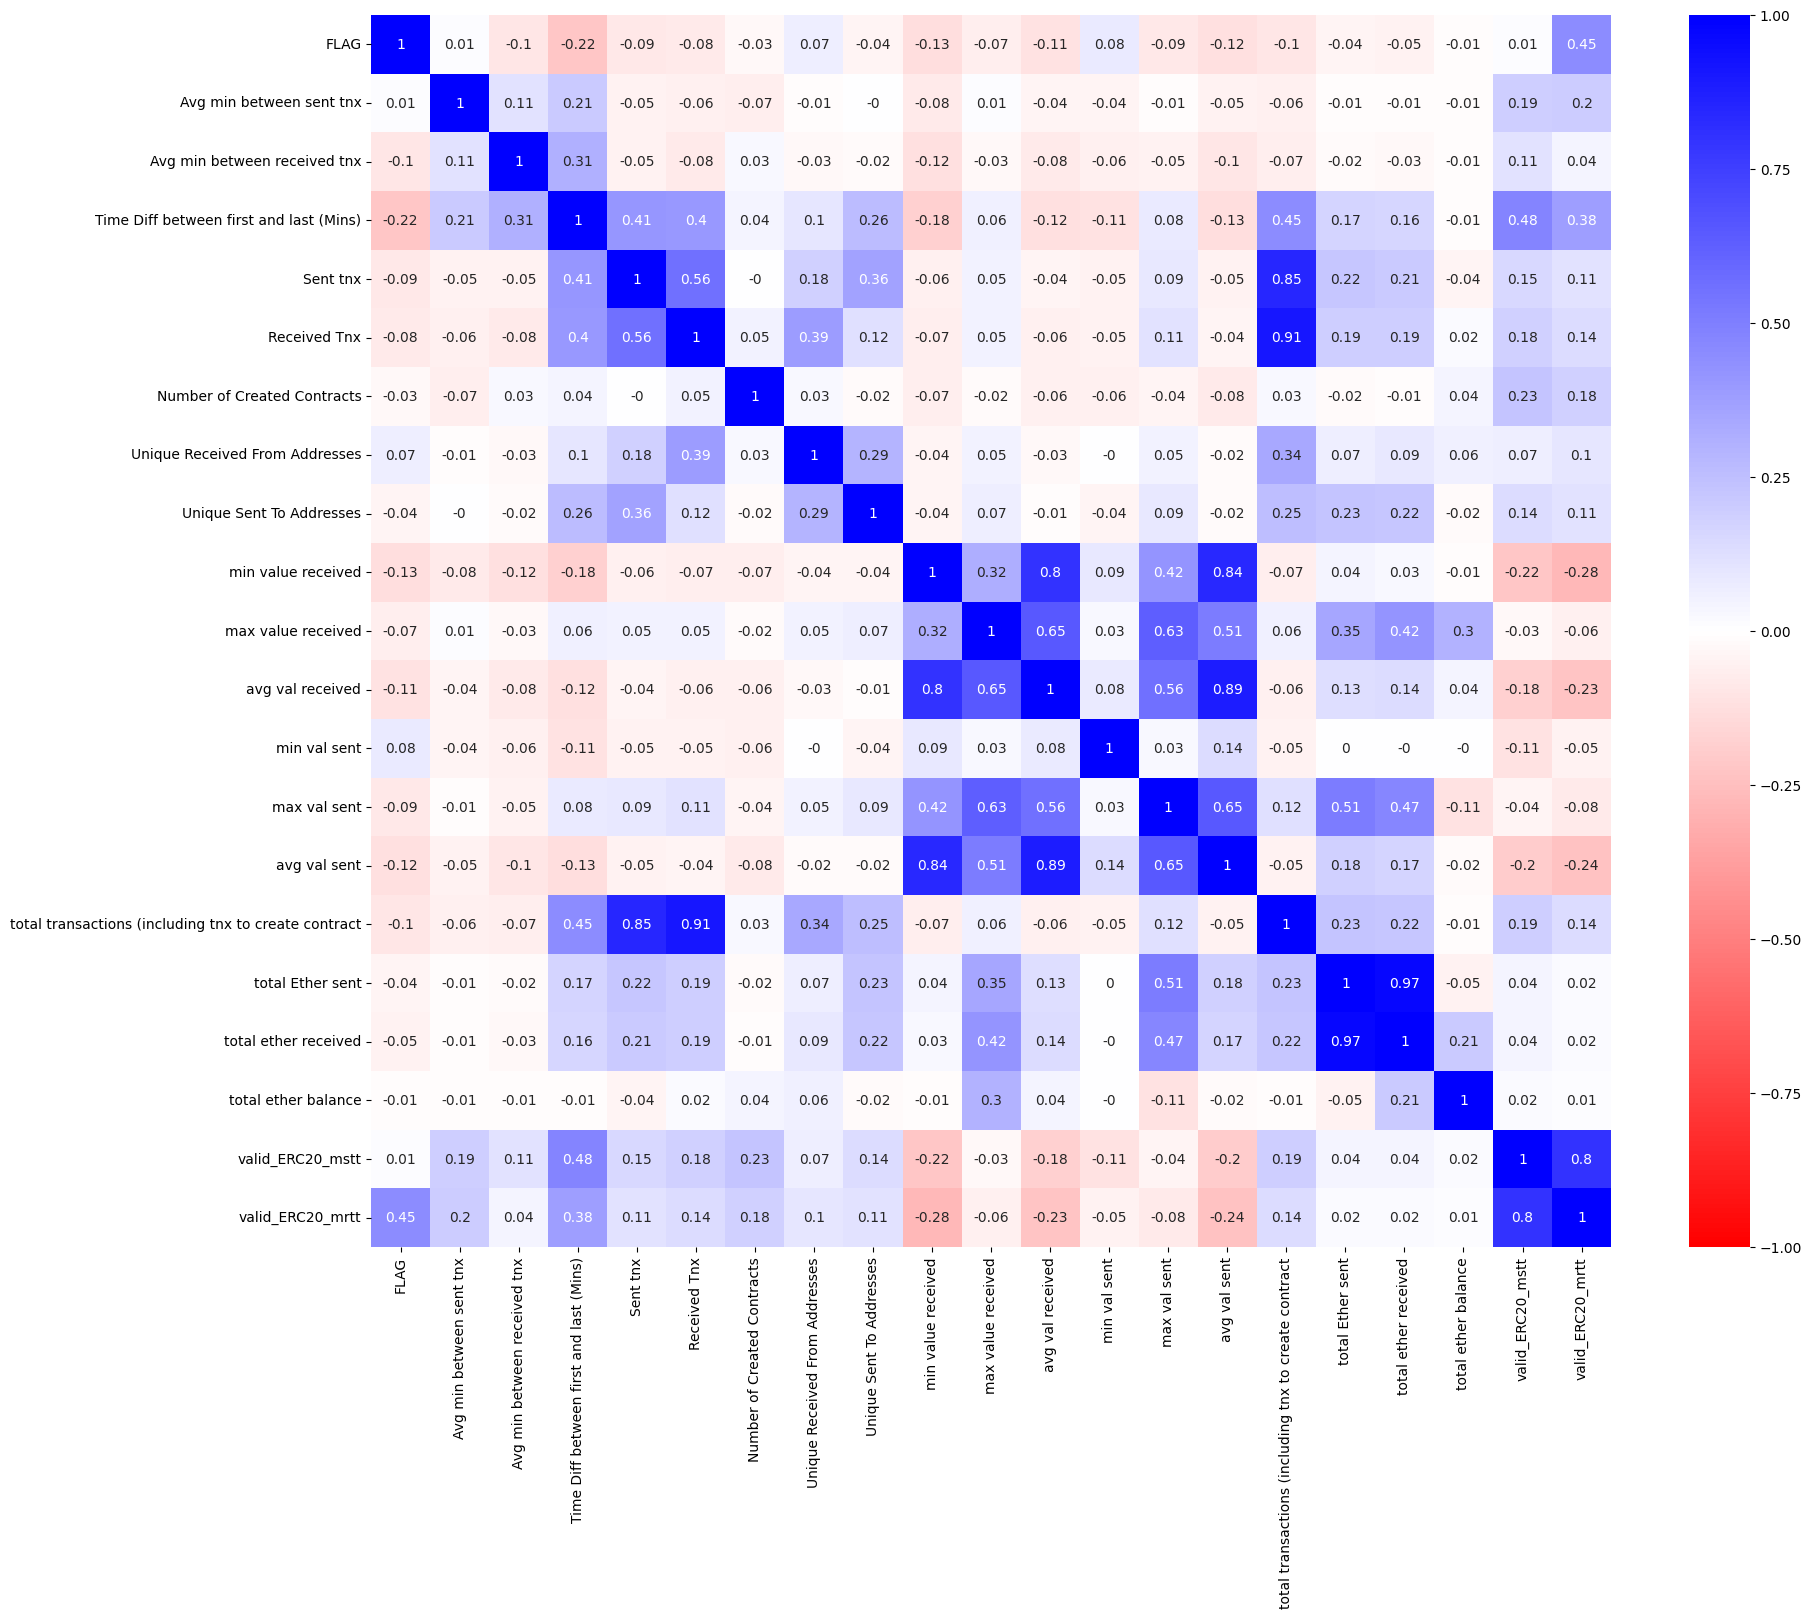

In [65]:
plt.figure(figsize=(20, 16))
sns.heatmap(df.corr().round(2), cmap=cmap, vmin=-1, vmax=1, annot=True)
plt.show()

## Remove multicollinearity

### VIF - Variance Inflation Factor

In [66]:
y = df_standardized["FLAG"]
X = df_standardized.drop(columns="FLAG")

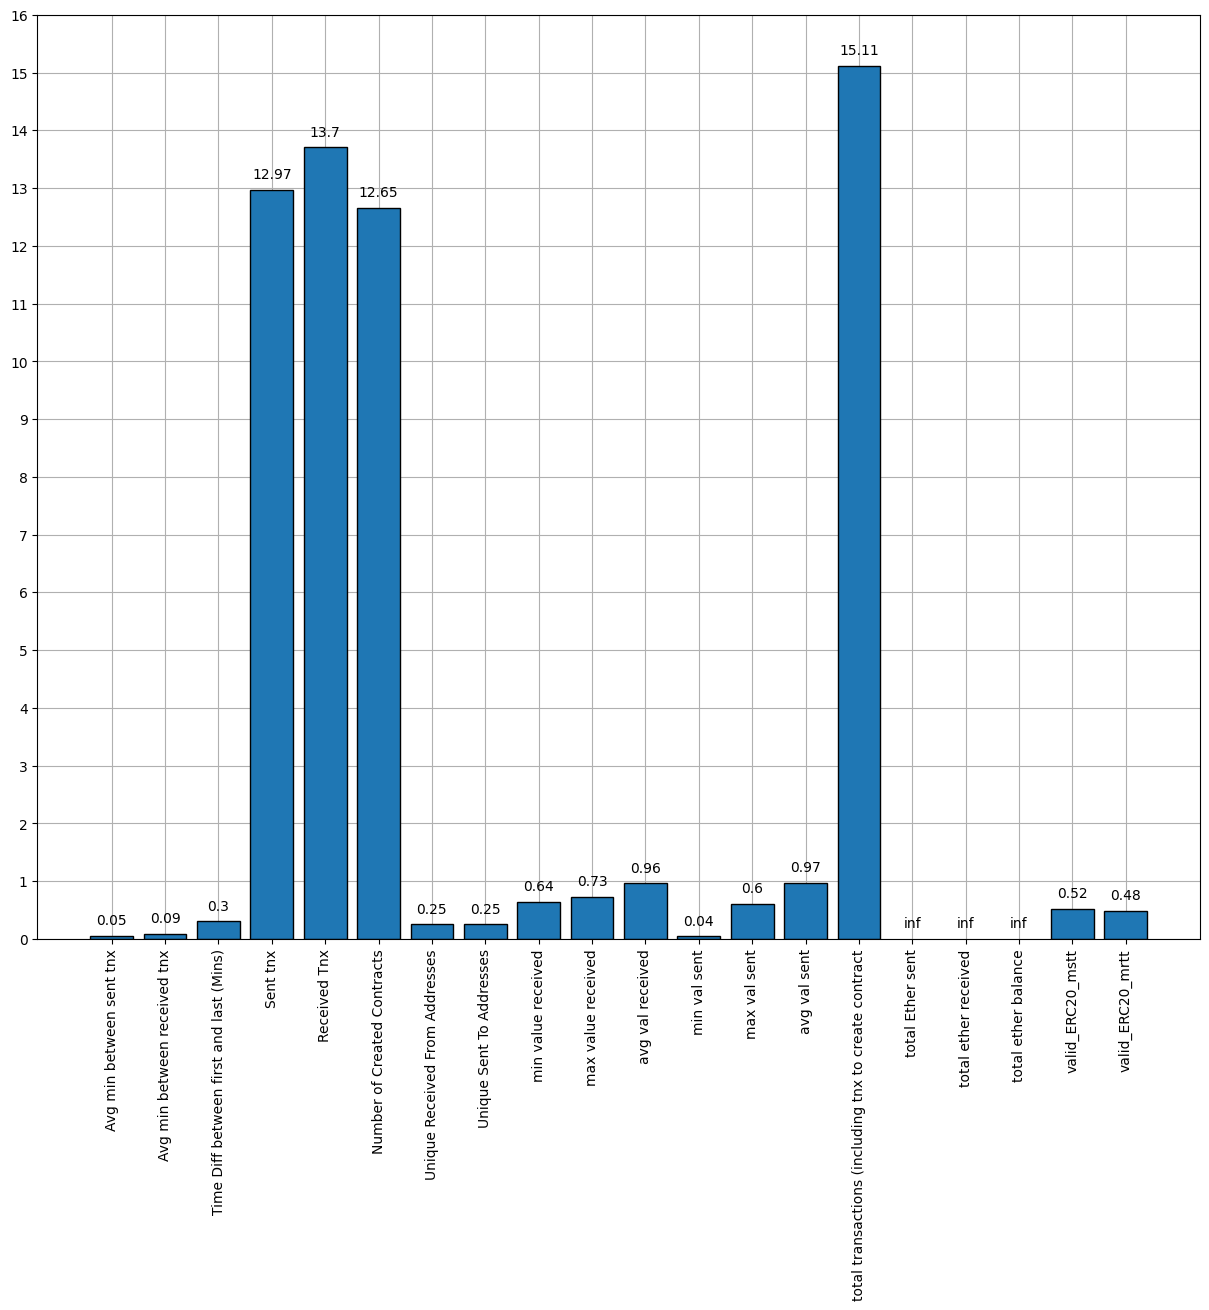

In [67]:
vif_data = pd.DataFrame()
vif_data["feature"] = X.columns
  
# calculating VIF for each feature
vif_data["VIF"] = [variance_inflation_factor(X.values, i)
                          for i in range(len(X.columns))]

vif_data["bar_label"] = vif_data["VIF"].apply(lambda x: 0 if x == np.inf else round(np.log10(x), 2))
vif_data["to_delete"] = np.log10(vif_data["VIF"]) > 1

plt.figure(figsize=(15, 12))
plt.bar(height=np.log10(vif_data["VIF"]), x=vif_data["feature"], edgecolor="black", zorder=2)


for i in range(len(X.columns)):
#     print(np.log10(vif_data["bar_label"][i])+0.2)
    plt.text(i, vif_data["bar_label"][i]+0.2, vif_data["bar_label"].apply(lambda x: np.inf if x==0 else x)[i], ha = 'center')
#     plt.text(i, np.log10(vif_data["bar_label"][i])+0.2, np.log10(vif_data["bar_label"][i]) > 1, ha = 'center')
    
    
plt.yticks(range(17))
plt.xticks(rotation=90)
plt.grid(zorder=1)

In [68]:
highly_corr_columns = list(vif_data.loc[~vif_data["to_delete"], "feature"])
highly_corr_columns

['Avg min between sent tnx',
 'Avg min between received tnx',
 'Time Diff between first and last (Mins)',
 'Unique Received From Addresses',
 'Unique Sent To Addresses',
 'min value received',
 'max value received',
 'avg val received',
 'min val sent',
 'max val sent',
 'avg val sent',
 'valid_ERC20_mstt',
 'valid_ERC20_mrtt']

In [69]:
X = X[highly_corr_columns]

In [70]:
y.value_counts(normalize=1)

FLAG
0    0.816824
1    0.183176
Name: proportion, dtype: float64

In [71]:
X.describe().round(3)

,Avg min between sent tnx,Avg min between received tnx,Time Diff between first and last (Mins),Unique Received From Addresses,Unique Sent To Addresses,min value received,max value received,avg val received,min val sent,max val sent,avg val sent,valid_ERC20_mstt,valid_ERC20_mrtt
count,8904.000,8904.000,8904.000,8904.000,8904.000,8904.000,8904.000,8904.000,8904.000,8904.000,8904.000,8904.000,8904.000
mean,-0.073,-0.068,-0.040,-0.079,-0.072,-0.034,-0.032,-0.015,-0.017,-0.030,-0.032,-0.023,-0.018
std,0.555,0.644,0.969,0.136,0.133,0.385,0.048,0.073,0.083,0.081,0.518,0.996,1.001
min,-0.244,-0.358,-0.705,-0.105,-0.101,-0.138,-0.041,-0.036,-0.036,-0.049,-0.192,-0.862,-1.054
25%,-0.244,-0.358,-0.704,-0.101,-0.097,-0.138,-0.041,-0.036,-0.036,-0.049,-0.191,-0.862,-1.054
50%,-0.243,-0.322,-0.536,-0.098,-0.093,-0.138,-0.041,-0.035,-0.035,-0.048,-0.184,-0.862,0.949
75%,-0.210,-0.108,0.210,-0.088,-0.090,-0.129,-0.036,-0.026,-0.029,-0.039,-0.089,1.160,0.949
max,4.977,4.989,4.954,4.684,4.597,4.304,1.826,2.098,2.769,2.957,4.659,1.160,0.949


In [72]:
X = standardize(X)

### Save data

In [73]:
df = X.copy()
df["FLAG"] = y

path = folder_name + "\data_cleaned_final.csv"
if not os.path.exists(path):
    df.to_csv(path)

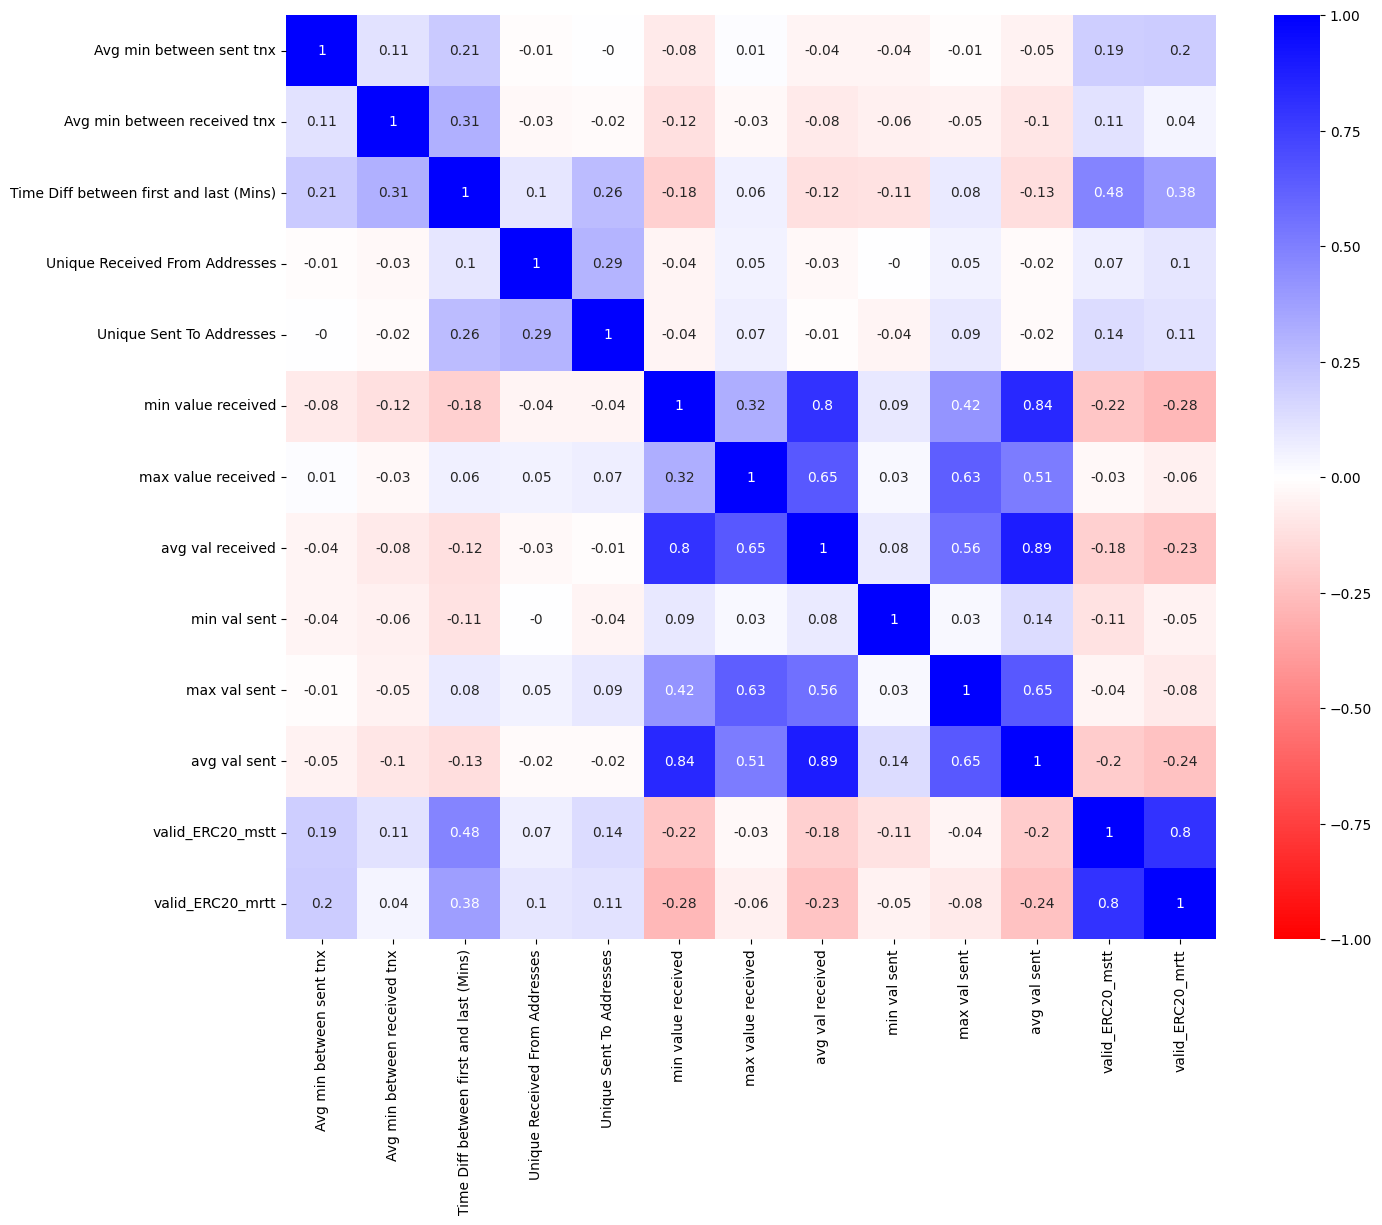

In [74]:
plt.figure(figsize=(15, 12))
sns.heatmap(X.corr(). round(2), cmap=cmap, vmin=-1, vmax=1, annot=True)
plt.show()

# Dimensionality Reduction

In [75]:
pca = PCA(X.shape[1], random_state=0)
pca_data = pca.fit_transform(X)
print(pca.explained_variance_ratio_)
print(pca.explained_variance_ratio_.sum().round(5))
pca_data.shape

[0.29061214 0.17415404 0.09716633 0.08436367 0.07444365 0.06714566
 0.05819899 0.05584114 0.03797249 0.0309766  0.01396498 0.01020968
 0.00495063]
1.0


(8904, 13)

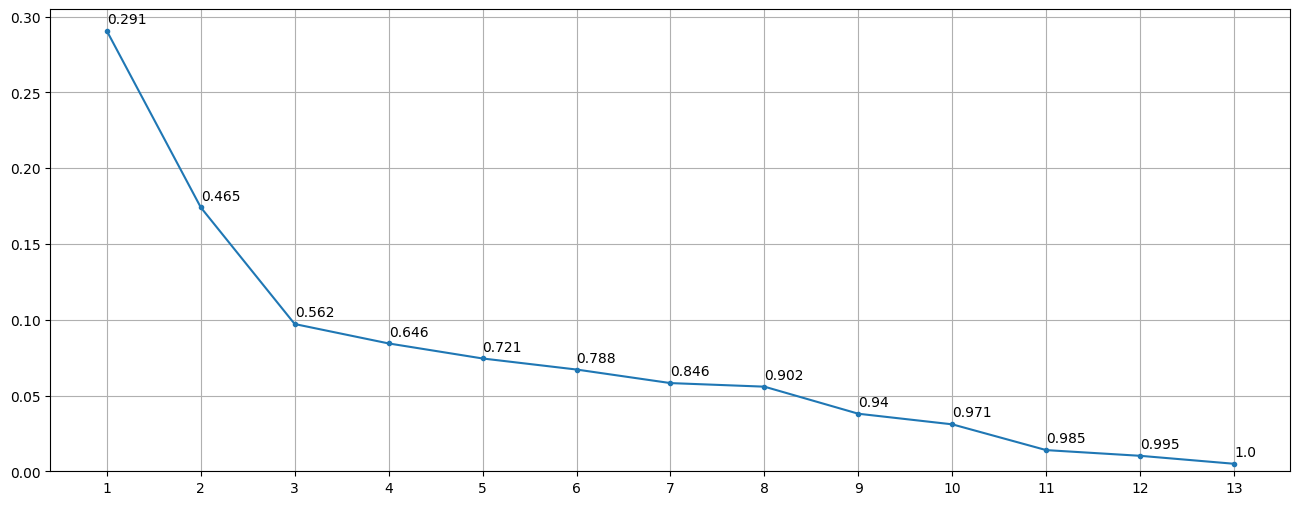

In [76]:
plt.figure(figsize=(16, 6))

plt.plot(range(1, X.shape[1]+1), pca.explained_variance_ratio_, ".-")
for i in range(X.shape[1]):
    plt.text(i+1, pca.explained_variance_ratio_[i]+0.005, pca.explained_variance_ratio_.cumsum()[i].round(3))
plt.ylim(bottom=0)
plt.xticks(range(1, X.shape[1]+1))
plt.grid()
plt.show()

In [77]:
n_features = 10

X_pca = pd.DataFrame(
    columns=[f"feat{i}" for i in range(1, n_features+1)],
    data=pca_data[:, :n_features]
)
X_pca

,feat1,feat2,feat3,feat4,feat5,feat6,feat7,feat8,feat9,feat10
0,-1.239829,2.369629,2.209878,-0.149751,-0.080450,-0.232343,-0.556260,1.621178,0.051903,-0.225671
1,-1.511464,2.448054,-0.458822,-0.060262,0.057714,0.048328,-0.149191,0.700945,-1.952545,-0.663125
2,-0.188044,1.884657,-0.546033,0.069609,-0.061377,-0.117409,0.228205,-0.159785,0.366779,0.176092
3,0.020278,-1.376959,0.046447,-0.243793,0.132684,0.850274,0.437339,0.162599,-0.069910,0.011932
4,0.011103,-1.387864,0.703279,-0.431470,-0.294330,0.251400,0.281444,0.298845,0.084915,0.018442
...,...,...,...,...,...,...,...,...,...,...
8899,-0.864113,0.305099,-0.123741,1.284671,-0.613054,-0.339036,-0.129400,-0.242161,0.601348,0.146196
8900,-0.486376,-0.288686,-0.032135,0.423568,-0.143958,0.916934,0.180027,-0.148877,0.363810,0.111734
8901,-0.602792,0.194113,1.120917,-0.054969,-0.131012,0.232269,-0.043615,0.283428,0.212469,-0.034034
8902,-0.857332,0.293440,-0.122590,1.292267,-0.615799,-0.335372,-0.131584,-0.247227,0.621112,0.151189


### Save data

In [78]:
df = X_pca.copy()
df["FLAG"] = y

path = folder_name + "\data_cleaned_dim_red.csv"
if not os.path.exists(path):
    df.to_csv(path)

# Split data into training and test

In [79]:
X_train, X_test, y_train, y_test = train_test_split(X_pca, y, test_size=0.2, random_state=0)
y_train.value_counts()

FLAG
0    5814
1    1309
Name: count, dtype: int64

(-5.0, 30.0)

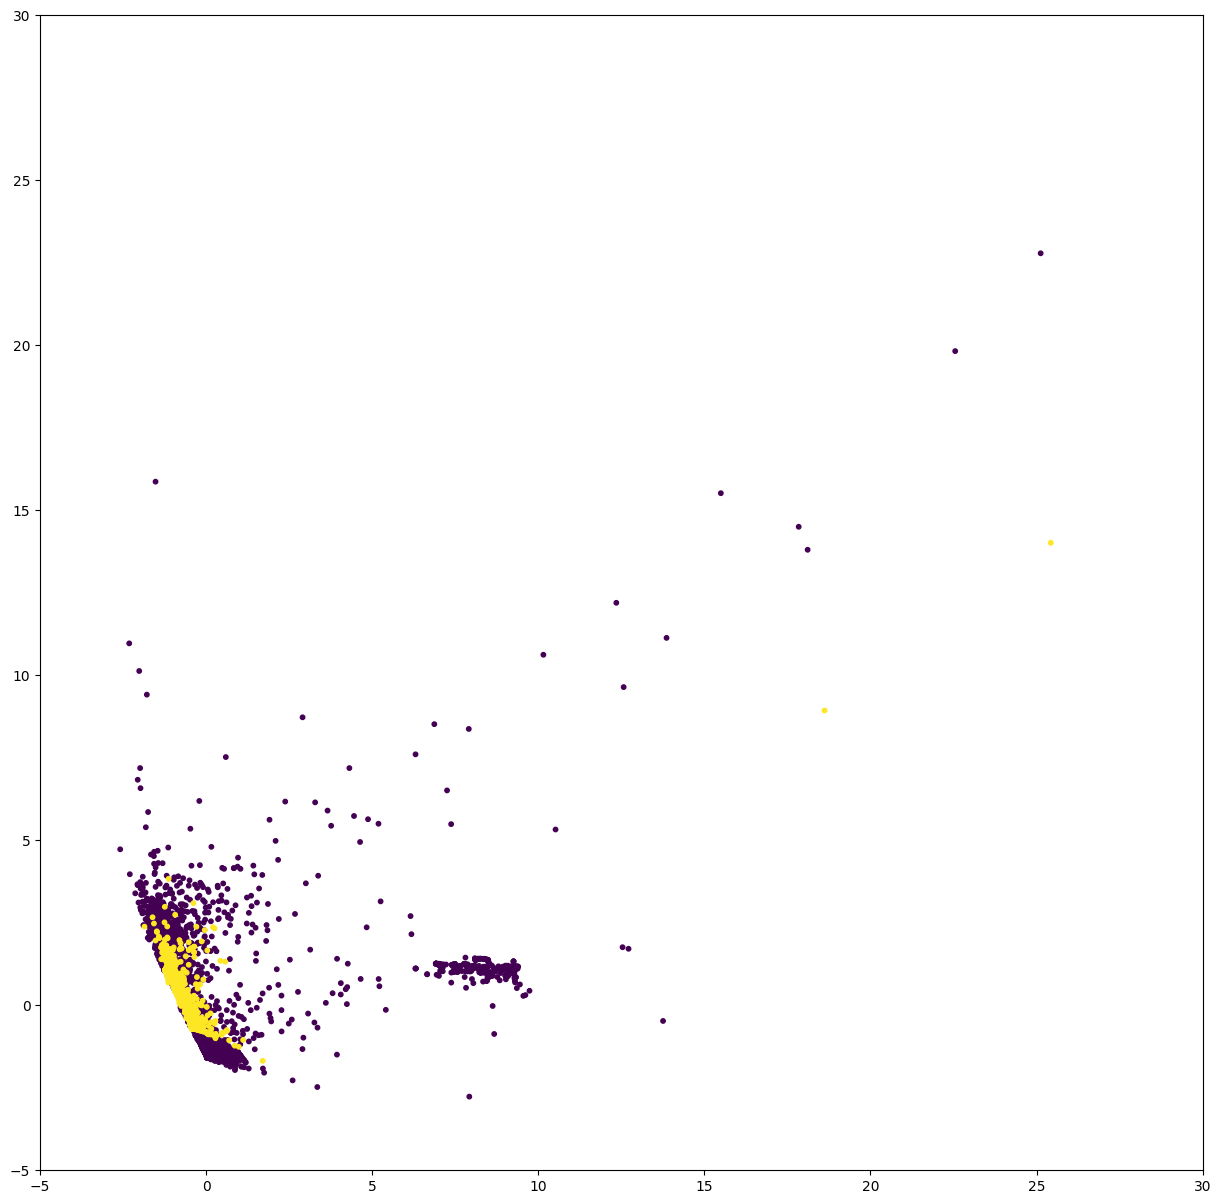

In [80]:
plt.figure(figsize=(15, 15))
plt.scatter(pca_data[:, 0], pca_data[:, 1], c=y, s=10)
plt.xlim(-5, 30)
plt.ylim(-5, 30)

# Build Models

In [81]:
def g_mean(y_test, y_pred):
    conf_mat = confusion_matrix(y_test, y_pred)
    tn, fp, fn, tp = conf_mat.ravel()
    specificity = tn / (tn + fp)
    sensitivity = tp / (tp + fn)
    return np.sqrt(specificity * sensitivity)

In [82]:
def g_mean_weighted(y_test, y_pred, param=5):
    conf_mat = confusion_matrix(y_test, y_pred)
    tn, fp, fn, tp = conf_mat.ravel()
    specifity = tn / (tn+fp)
    sensitivity = tp / (tp + fn)
    return (specifity * sensitivity**param)**(1/(param+1))

In [83]:
def plot_confusion_matrix(y_pred, y_test, title=""):
    
    lens = y_test.value_counts().to_numpy()
    conf_mat = confusion_matrix(y_test, y_pred)
    conf_mat_pct = np.divide(conf_mat.T, lens).T
    
    tn, fp, fn, tp = conf_mat.ravel()
    specificity = tn / (tn + fp)
    sensitivity = tp / (tp + fn)
    g_mean = np.sqrt(specificity * sensitivity)

    plt.figure(figsize=(16, 6))
    plt.suptitle(title, fontsize=25, y=1)

    plt.subplot(1,2,1)
    plt.title("Confusion Matrix, Counts")
    sns.heatmap(conf_mat, annot=True, cmap="Blues", vmin=0, fmt=".0f")
    plt.text(0,2.23,g_mean,fontsize=12)

    plt.subplot(1,2,2)
    plt.title("Confusion Matrix, Percentage")
    sns.heatmap(conf_mat_pct, annot=True, cmap="Blues", vmin=0, vmax=1, fmt=".3f")
    
    plt.show()
    
    return conf_mat, conf_mat_pct, g_mean

### SMOTE, SMOTEENN

In [84]:
smote = SMOTE(random_state=0)
X_train_smote, y_train_smote = smote.fit_resample(X_train, y_train)
y_train_smote.value_counts()

FLAG
1    5814
0    5814
Name: count, dtype: int64

In [85]:
smoteenn = SMOTEENN(random_state=0)
X_train_smoteenn, y_train_smoteenn = smoteenn.fit_resample(X_train, y_train)
y_train_smoteenn.value_counts()

FLAG
1    5580
0    5396
Name: count, dtype: int64

In [86]:
model_names = []
params = []
geometric_mean = []
sensitivity = []
specificity = []
is_smote = []
exec_time = []
models = []

In [87]:
def train_predict_evaluate_save_model(
        model,
        X_train, y_train, X_test, y_test,
        params_val, is_smote_val, 
        model_name, folder_name):
    
    start = time.time()
    model.fit(X_train, y_train)
    end = time.time()
    y_pred = model.predict(X_test)
    
    conf_mat, conf_mat_pct, g_mean = plot_confusion_matrix(y_pred, y_test, type(model).__name__)
    print(g_mean)
    
    model_names.append(type(model).__name__)
    params.append(params_val)
    geometric_mean.append(g_mean.round(4))
    sensitivity.append(conf_mat_pct[1][1].round(4))
    specificity.append(conf_mat_pct[0][0].round(4))
    is_smote.append(is_smote_val)
    exec_time.append(round((end - start), 2))
    models.append((model, g_mean))
    
    
    path = folder_name + model_name
    if not os.path.exists(path):
        joblib.dump(model, path)
    
    return model, conf_mat, conf_mat_pct, g_mean

## Logistic Regression

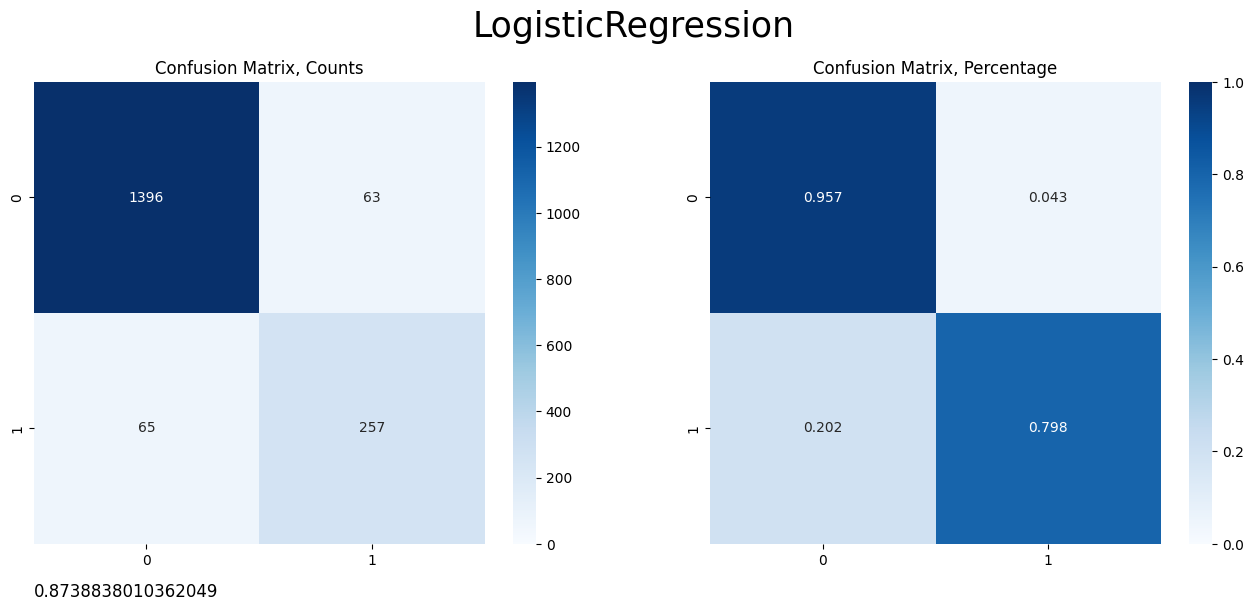

0.8738838010362049


In [88]:
logreg = LogisticRegression(random_state=0)

_, _, _, _ = train_predict_evaluate_save_model(
    logreg, 
    X_train, y_train, X_test, y_test,
    "No", "No",
    "\logreg_np_ns.joblib", folder_name
)

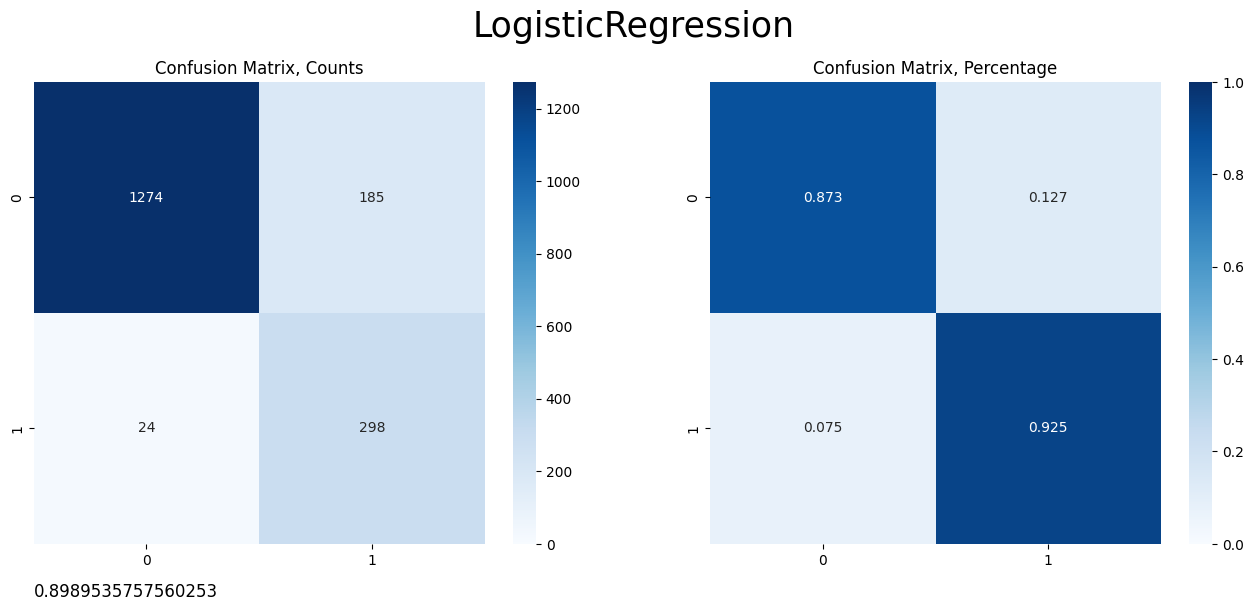

0.8989535757560253


In [89]:
logreg = LogisticRegression(class_weight='balanced', random_state=0)

_, _, _, _ = train_predict_evaluate_save_model(
    logreg, 
    X_train, y_train, X_test, y_test,
    params_val="Manual", is_smote_val="No",
    model_name="\logreg_manual_ns.joblib", folder_name=folder_name
)

## GaussianNB

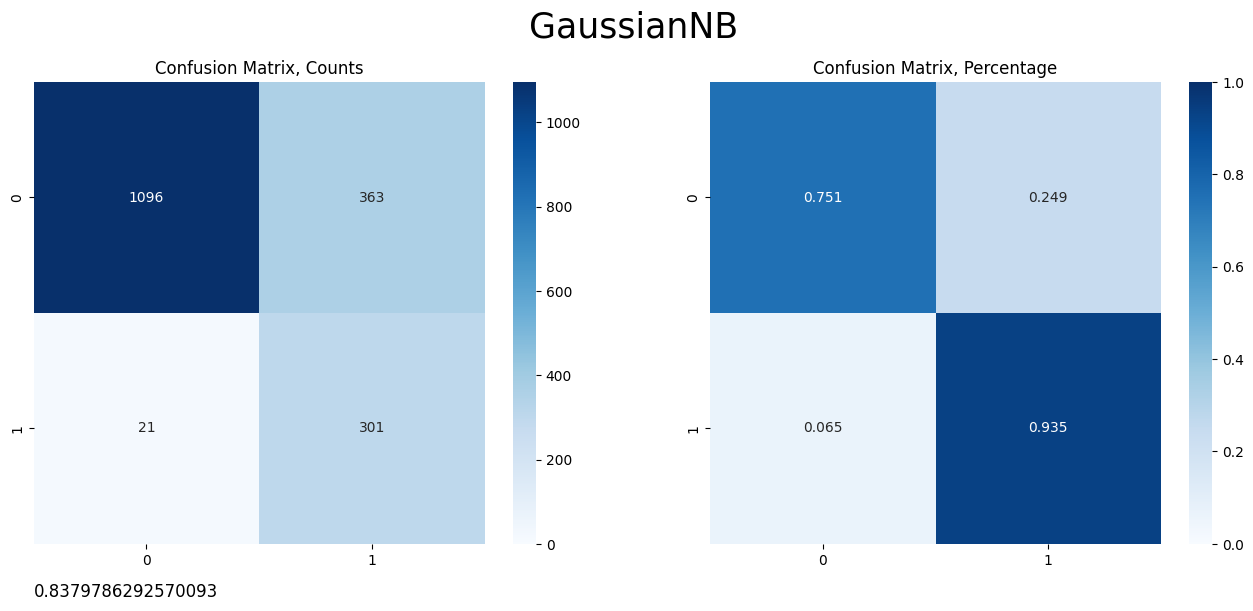

0.8379786292570093


In [91]:
gnb = GaussianNB()

_, _, _, _ = train_predict_evaluate_save_model(
    gnb, 
    X_train, y_train, X_test, y_test,
    params_val="No", is_smote_val="No",
    model_name="\gaussnb_np_ns.joblib", folder_name=folder_name
)

## SVC

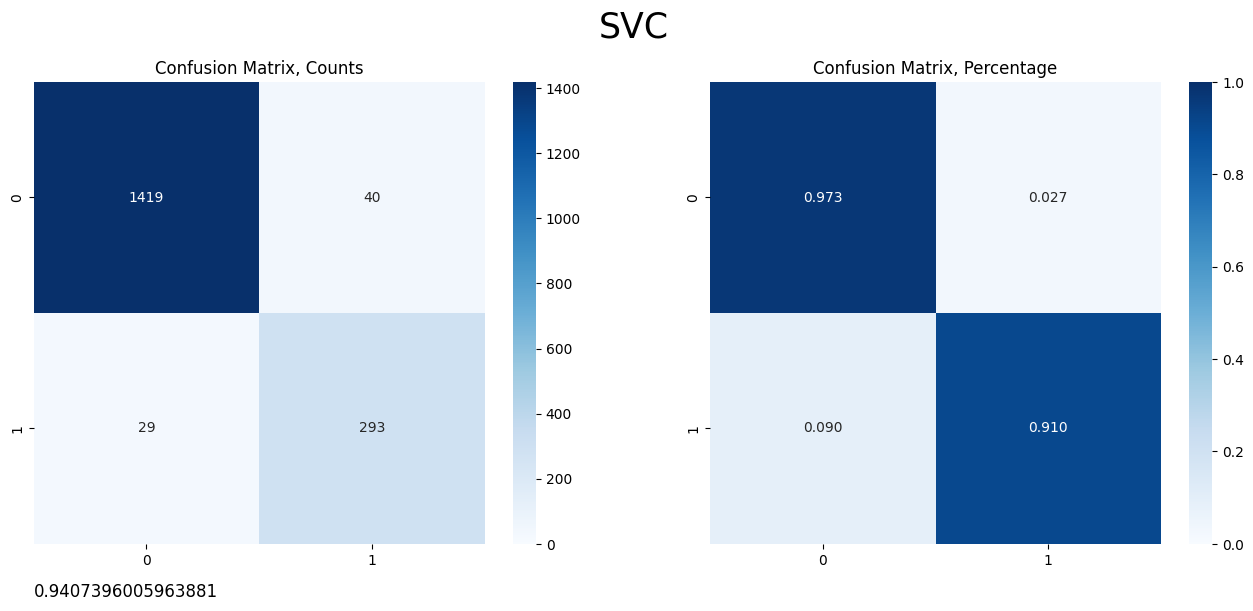

0.9407396005963881


In [92]:
svc = SVC(random_state=0)

_, _, _, _ = train_predict_evaluate_save_model(
    svc, 
    X_train, y_train, X_test, y_test,
    params_val="No", is_smote_val="No",
    model_name="\svc_np_ns.joblib", folder_name=folder_name
)

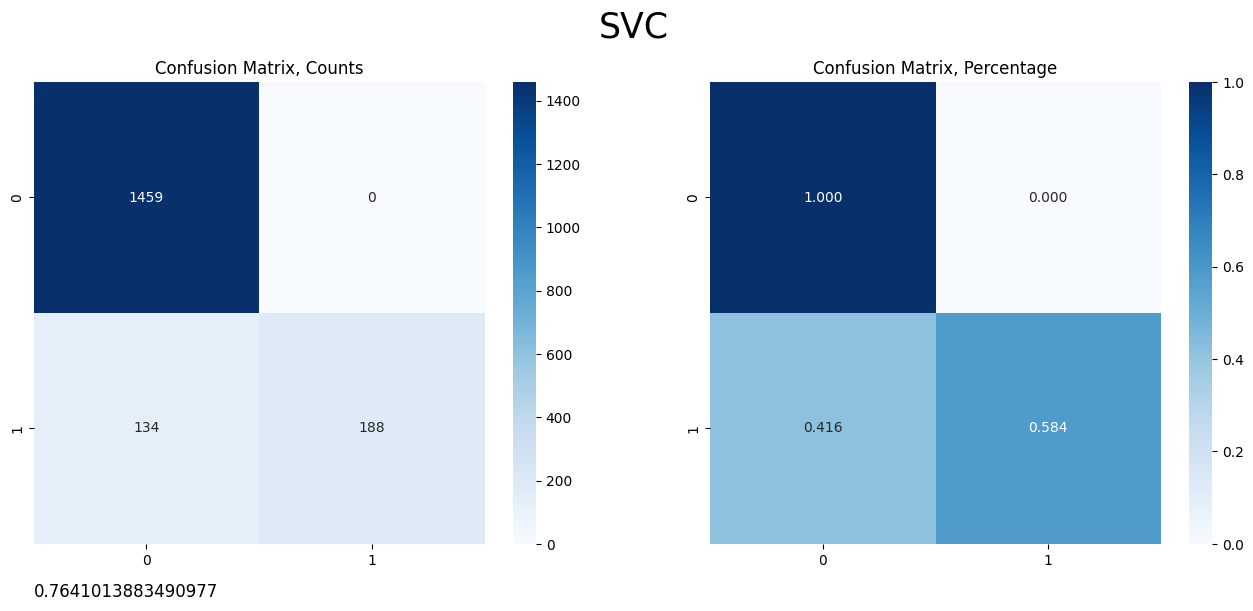

0.7641013883490977


In [94]:
weights = dict(y_train.value_counts(1))
svc = SVC(gamma="scale", class_weight=weights, random_state=0)

_, _, _, _ = train_predict_evaluate_save_model(
    svc, 
    X_train, y_train, X_test, y_test,
    params_val="Manual", is_smote_val="No",
    model_name="\svc_manual_ns.joblib", folder_name=folder_name
)

In [95]:
param = int(y_train.value_counts()[0] / y_train.value_counts()[1])

g_mean_weighted_scorer = make_scorer(g_mean_weighted, param=param)
params_grid_svc = {
    "C": [0.1, 0.3, 0.5, 0.8, 1, 2, 3],
    "kernel": ["linear", "poly", "rbf", "sigmoid"],
    "gamma": ["scale", "auto"],
    "class_weight": ["balanced", None]
}

svc = SVC(random_state=0)
grid_svc = GridSearchCV(svc, params_grid_svc, scoring=g_mean_weighted_scorer)
grid_svc.fit(X_train, y_train)

grid_svc.best_params_

{'C': 0.8, 'class_weight': 'balanced', 'gamma': 'auto', 'kernel': 'rbf'}

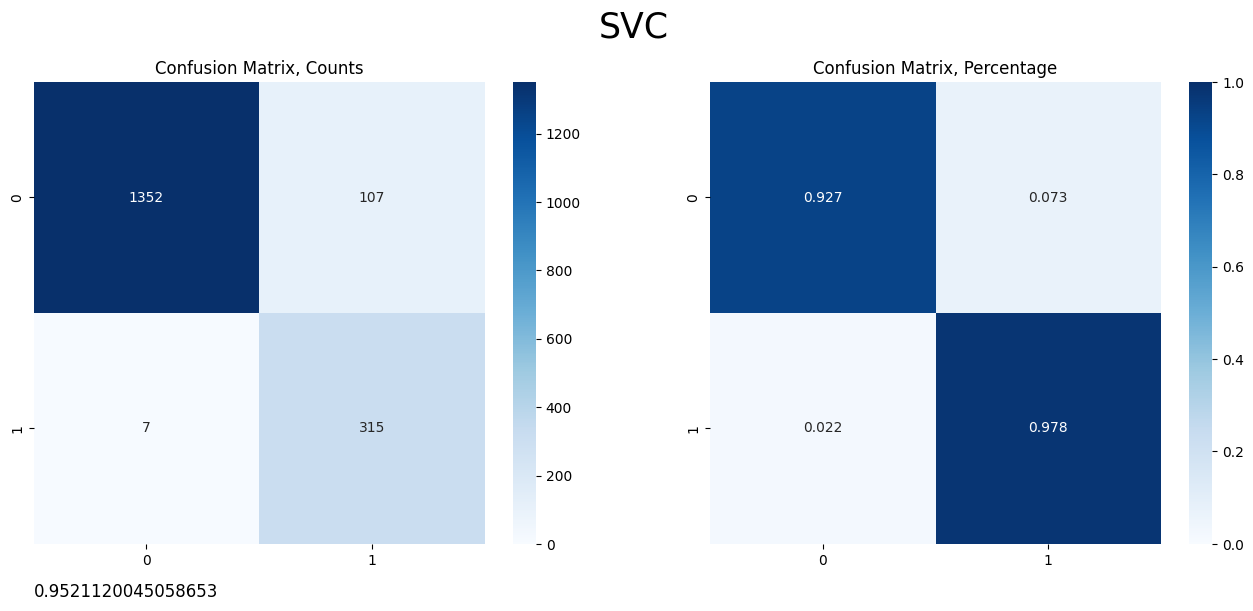

0.9521120045058653


In [96]:
svc = SVC(**grid_svc.best_params_)

_, _, _, _ = train_predict_evaluate_save_model(
    svc, 
    X_train, y_train, X_test, y_test,
    params_val="GridSearch", is_smote_val="No",
    model_name="\svc_gs_ns.joblib", folder_name=folder_name
)

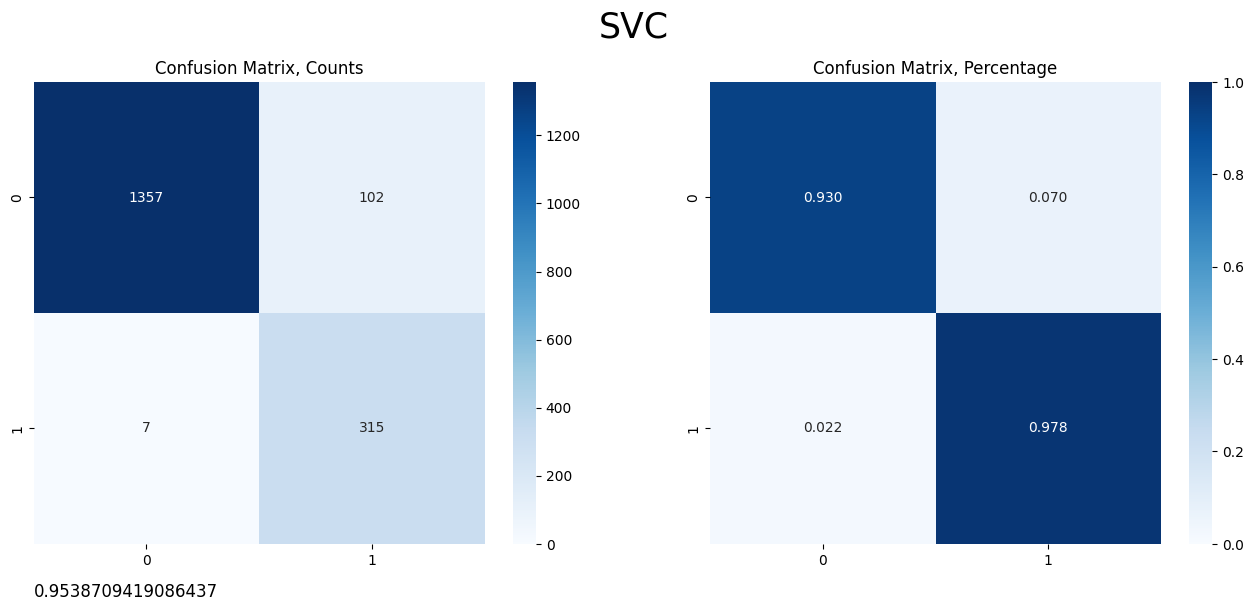

0.9538709419086437


In [97]:
_, _, _, _ = train_predict_evaluate_save_model(
    svc, 
    X_train_smote, y_train_smote, X_test, y_test,
    params_val="GridSearch", is_smote_val="SMOTE",
    model_name="\svc_gs_smote.joblib", folder_name=folder_name
)

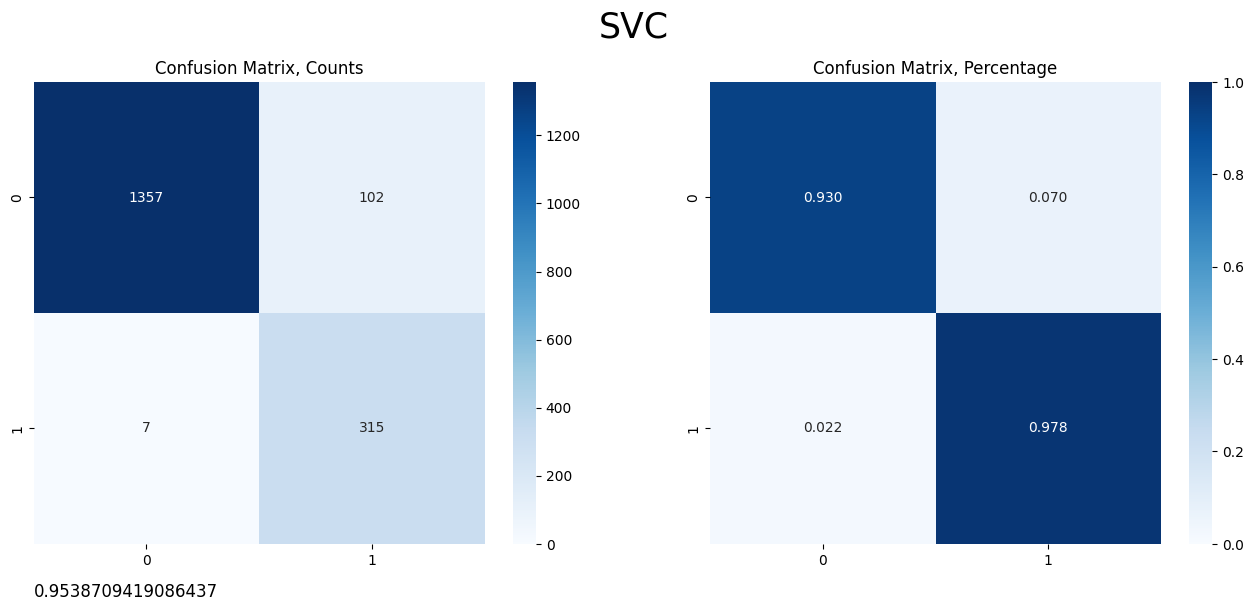

0.9538709419086437


In [98]:
_, _, _, _ = train_predict_evaluate_save_model(
    svc, 
    X_train_smoteenn, y_train_smoteenn, X_test, y_test,
    params_val="GridSearch", is_smote_val="SMOTEENN",
    model_name="\svc_gs_smoteenn.joblib", folder_name=folder_name
)

## KNNeighbors

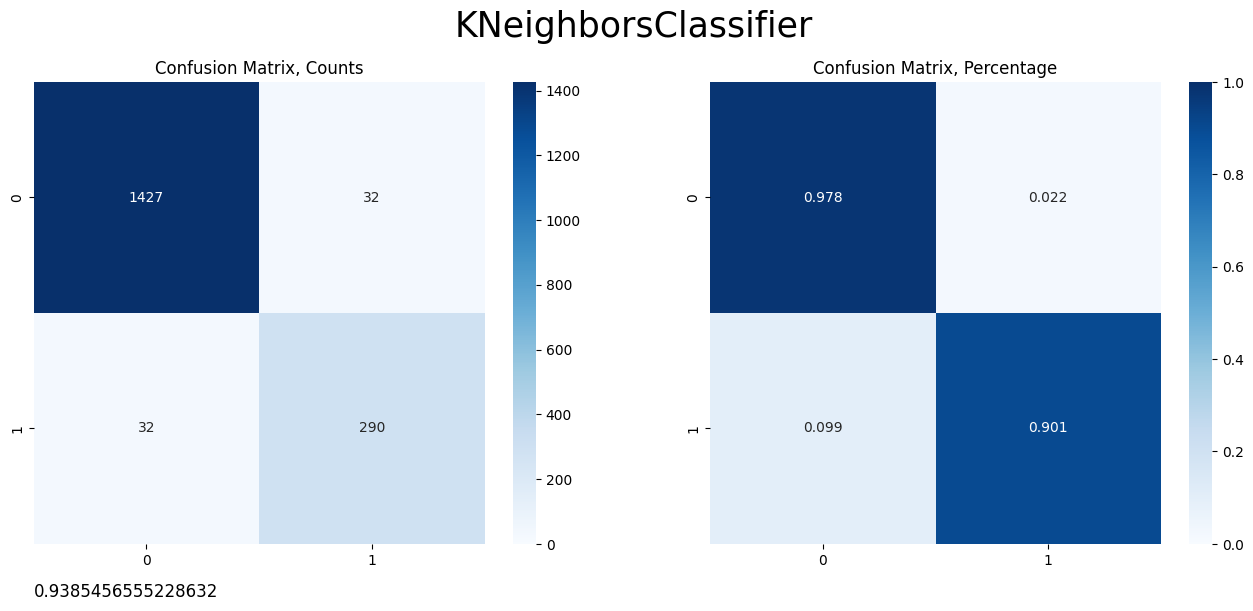

0.9385456555228632


In [99]:
knn = KNeighborsClassifier(n_neighbors=5)

_, _, _, _ = train_predict_evaluate_save_model(
    knn, 
    X_train, y_train, X_test, y_test,
    params_val="Manual", is_smote_val="No",
    model_name="\knn_maunal_ns.joblib", folder_name=folder_name
)

In [100]:
g_mean_weighted_scorer = make_scorer(g_mean_weighted, param=1)
params_grid_knn = {
    "n_neighbors": [3, 5, 7, 9, 11],
    "weights": ["uniform", "distance"],
    "algorithm": ["auto", "ball_tree", "kd_tree", "brute"],
    "leaf_size": [10, 20, 30, 40, 50]
}

knn = KNeighborsClassifier()
grid_knn = GridSearchCV(knn, params_grid_knn, scoring=g_mean_weighted_scorer)
grid_knn.fit(X_train, y_train)

grid_knn.best_params_

{'algorithm': 'auto', 'leaf_size': 10, 'n_neighbors': 3, 'weights': 'uniform'}

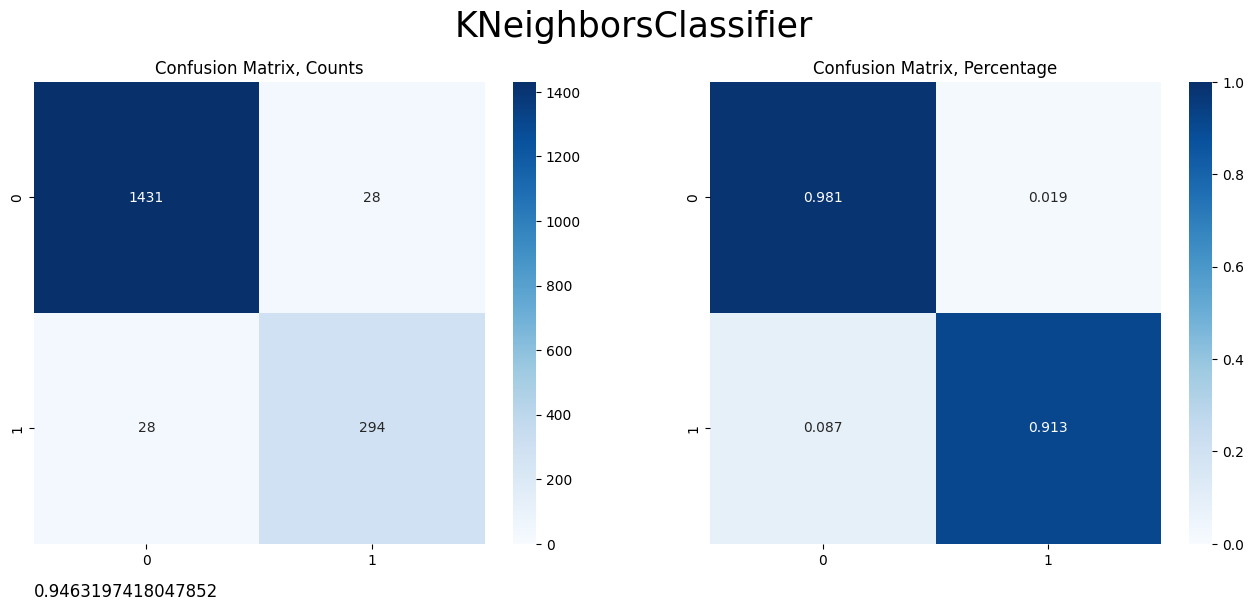

0.9463197418047852


In [101]:
knn = KNeighborsClassifier(**grid_knn.best_params_)

_, _, _, _ = train_predict_evaluate_save_model(
    knn, 
    X_train, y_train, X_test, y_test,
    params_val="GridSearch", is_smote_val="No",
    model_name="\knn_gs_ns.joblib", folder_name=folder_name
)

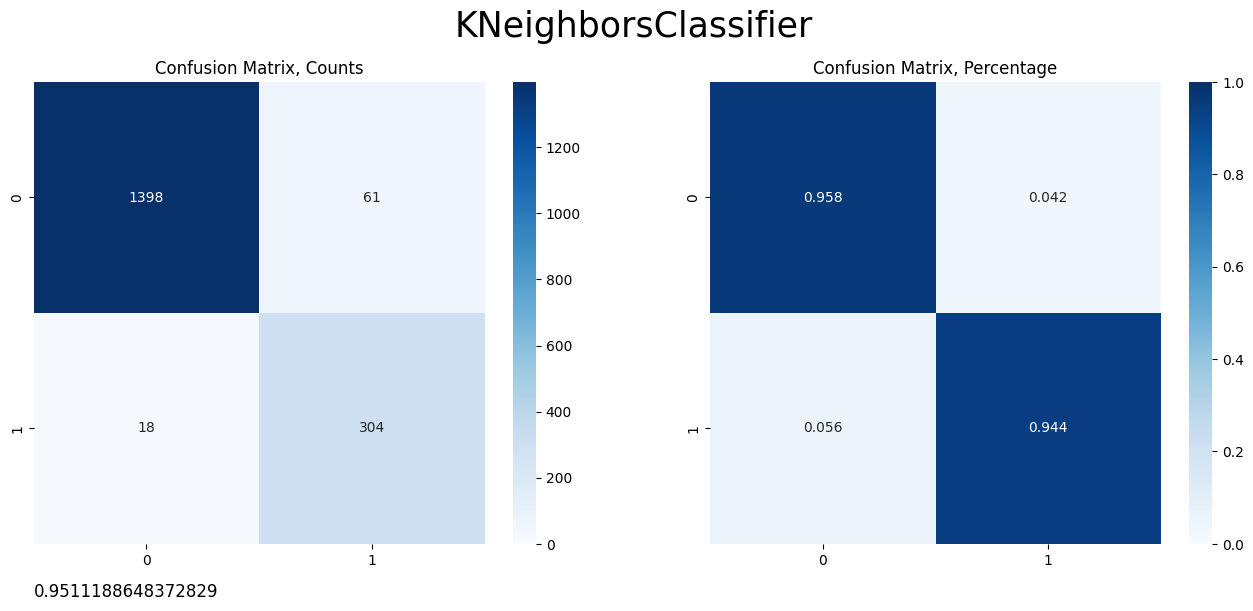

0.9511188648372829


In [102]:
knn = KNeighborsClassifier(**grid_knn.best_params_)

_, _, _, _ = train_predict_evaluate_save_model(
    knn, 
    X_train_smote, y_train_smote, X_test, y_test,
    params_val="GridSearch", is_smote_val="SMOTE",
    model_name="\knn_gs_smote.joblib", folder_name=folder_name
)

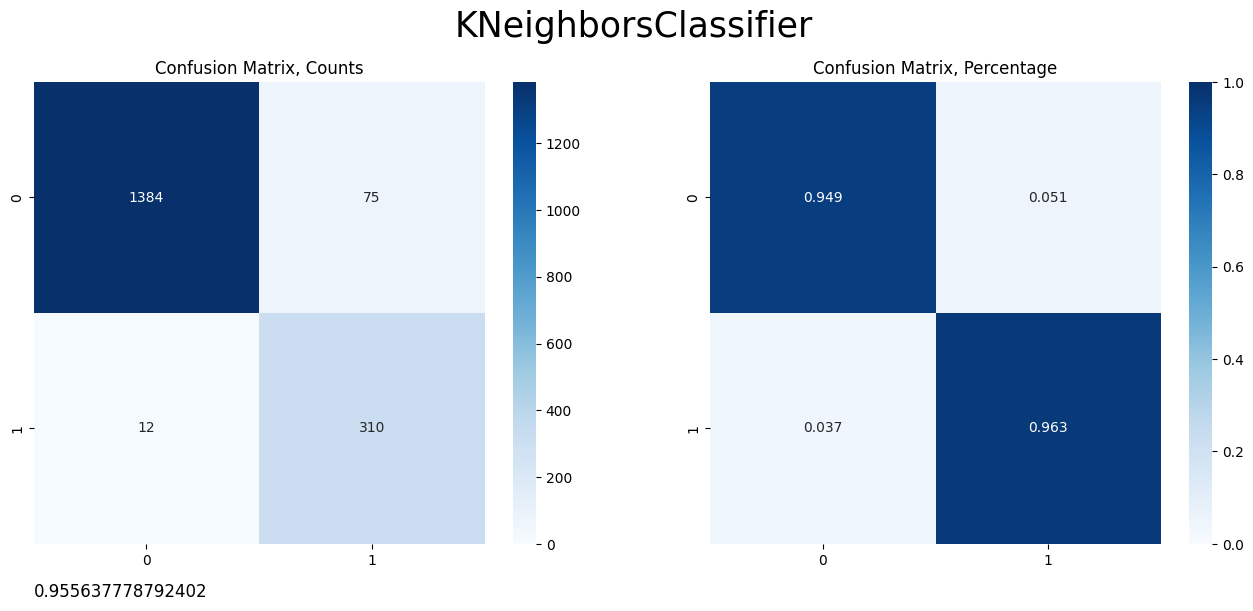

0.955637778792402


In [103]:
knn = KNeighborsClassifier(**grid_knn.best_params_)

_, _, _, _ = train_predict_evaluate_save_model(
    knn, 
    X_train_smoteenn, y_train_smoteenn, X_test, y_test,
    params_val="GridSearch", is_smote_val="SMOTEENN",
    model_name="\knn_gs_smoteenn.joblib", folder_name=folder_name
)

## XGBoost

In [104]:
g_mean_weighted_scorer = make_scorer(g_mean_weighted, param=1)

params_grid_xgb = {'learning_rate':[0.01, 0.1, 0.5],
              'n_estimators':[200, 350, 500, 650],
              'subsample':[0.3, 0.5, 0.7, 0.9],
               'max_depth':[4, 6, 8, 10],
               'colsample_bytree':[0.5, 0.7, 0.9]}

xgb = XGBClassifier()

In [105]:
grid_xgb = GridSearchCV(estimator=xgb, param_grid=params_grid_xgb, scoring=g_mean_weighted_scorer)
grid_xgb.fit(X_train, y_train)

grid_xgb.best_params_

{'colsample_bytree': 0.5,
 'learning_rate': 0.1,
 'max_depth': 4,
 'n_estimators': 350,
 'subsample': 0.9}

In [106]:
grid_xgb_smote = GridSearchCV(estimator=xgb, param_grid=params_grid_xgb, scoring=g_mean_weighted_scorer)
grid_xgb_smote.fit(X_train_smote, y_train_smote)

grid_xgb_smote.best_params_

{'colsample_bytree': 0.7,
 'learning_rate': 0.1,
 'max_depth': 10,
 'n_estimators': 500,
 'subsample': 0.7}

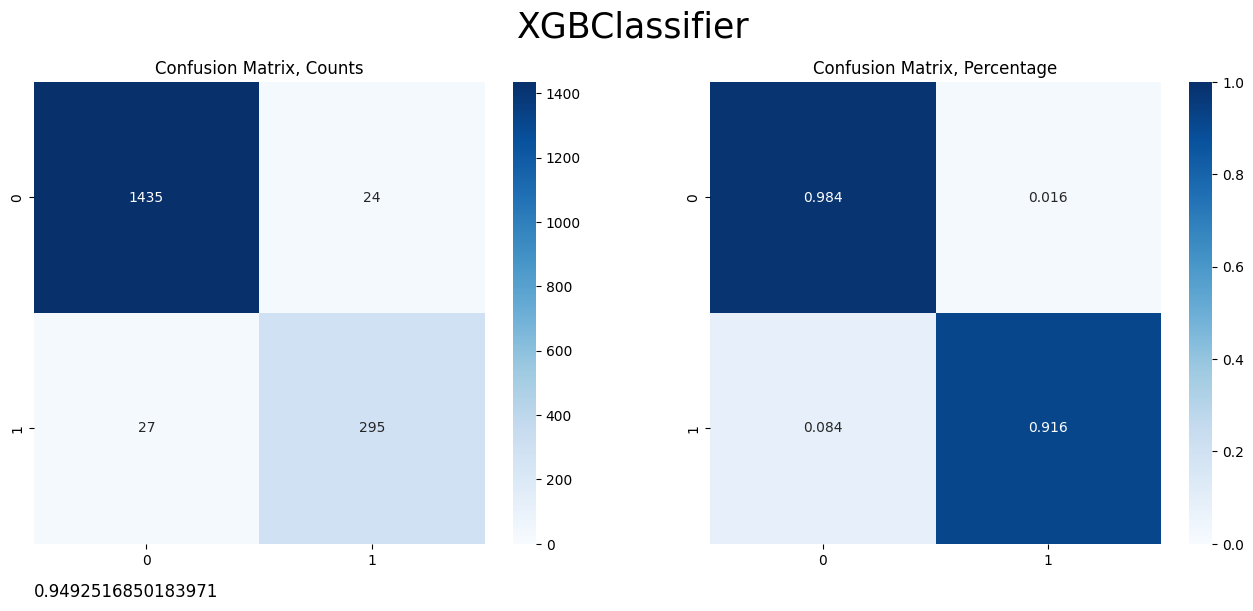

0.9492516850183971


In [108]:
xgb = XGBClassifier(**grid_xgb.best_params_)

_, _, _, _ = train_predict_evaluate_save_model(
    xgb, 
    X_train, y_train, X_test, y_test,
    params_val="GridSearch", is_smote_val="No",
    model_name=r"\xgb_gs_ns.joblib", folder_name=folder_name
)

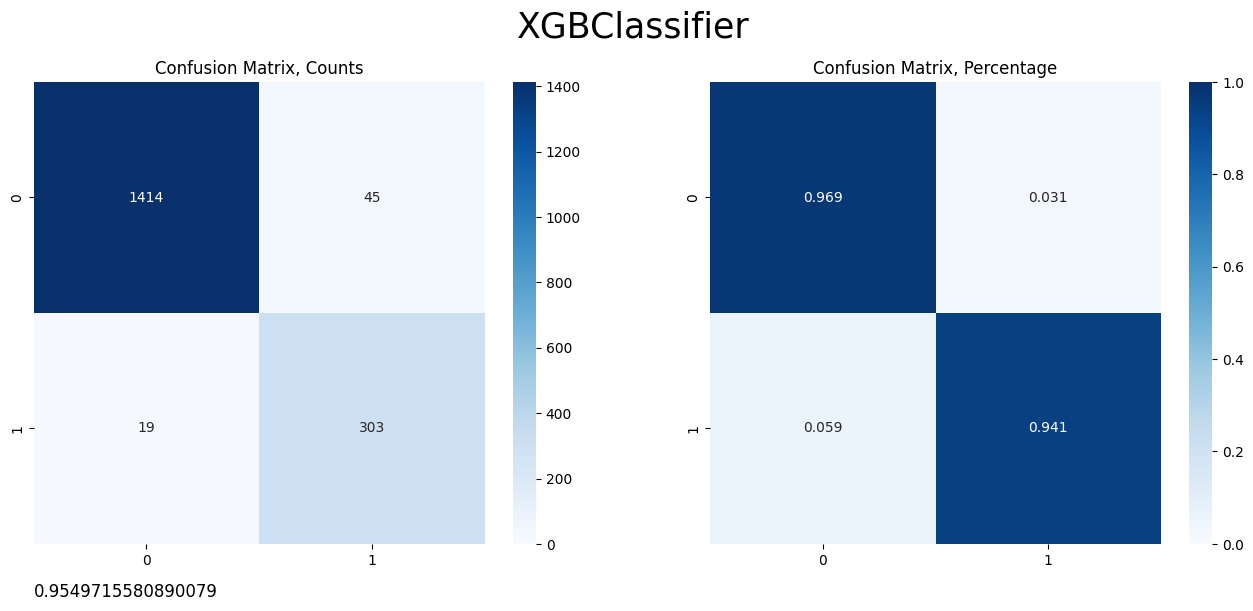

0.9549715580890079


In [109]:
xgb = XGBClassifier(**grid_xgb_smote.best_params_)

_, _, _, _ = train_predict_evaluate_save_model(
    xgb, 
    X_train_smote, y_train_smote, X_test, y_test,
    params_val="GridSearch", is_smote_val="SMOTE",
    model_name=r"\xgb_gs_smote.joblib", folder_name=folder_name
)

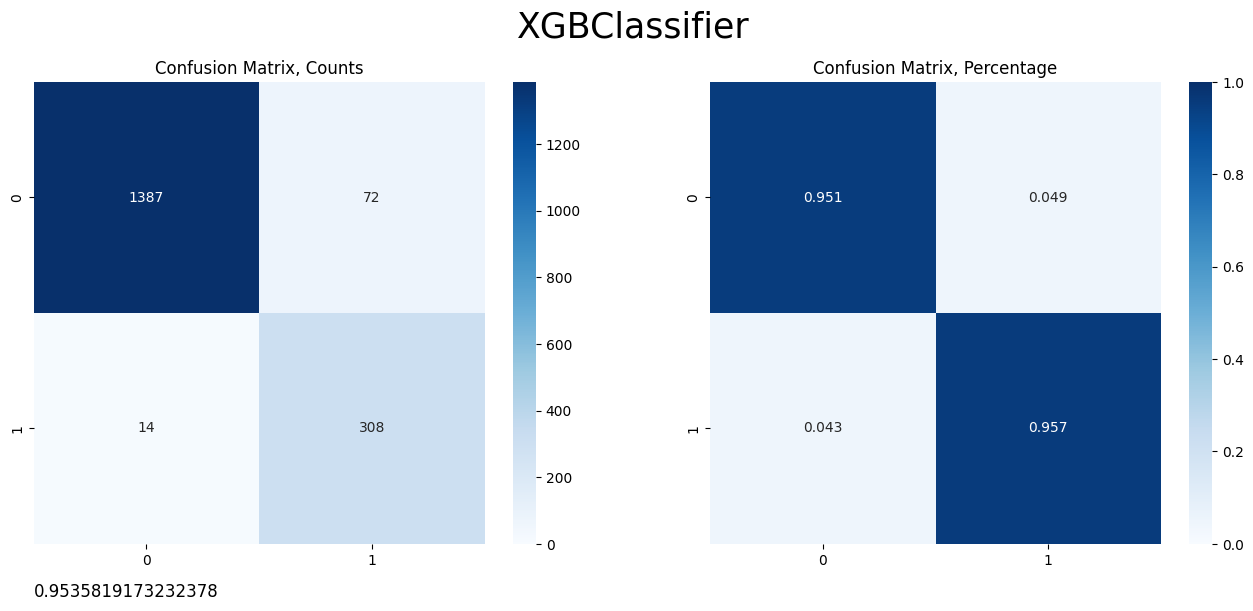

0.9535819173232378


In [110]:
xgb = XGBClassifier()

_, _, _, _ = train_predict_evaluate_save_model(
    xgb, 
    X_train_smoteenn, y_train_smoteenn, X_test, y_test,
    params_val="No", is_smote_val="SMOTEENN",
    model_name=r"\xgb_np_smoteenn.joblib", folder_name=folder_name
)

## DecisionTree

In [111]:
g_mean_weighted_scorer = make_scorer(g_mean_weighted, param=1)

params_grid_dec = {
    'criterion':["entropy", "log_loss"],
    'splitter':["best"],
    'max_depth':[4,5,6,7,8,9],
    'min_samples_split':[2,5,7,10,12,15,17,20],
    'max_features':["auto", "sqrt", "log2"]
}

dec_tree = DecisionTreeClassifier()

In [112]:
grid_dec = GridSearchCV(estimator=dec_tree, param_grid=params_grid_dec, scoring=g_mean_weighted_scorer)
grid_dec.fit(X_train, y_train)

grid_dec.best_params_

{'criterion': 'log_loss',
 'max_depth': 8,
 'max_features': 'sqrt',
 'min_samples_split': 15,
 'splitter': 'best'}

In [113]:
grid_dec_smote = GridSearchCV(estimator=dec_tree, param_grid=params_grid_dec, scoring=g_mean_weighted_scorer)
grid_dec_smote.fit(X_train_smote, y_train_smote)

grid_dec_smote.best_params_

{'criterion': 'entropy',
 'max_depth': 9,
 'max_features': 'log2',
 'min_samples_split': 5,
 'splitter': 'best'}

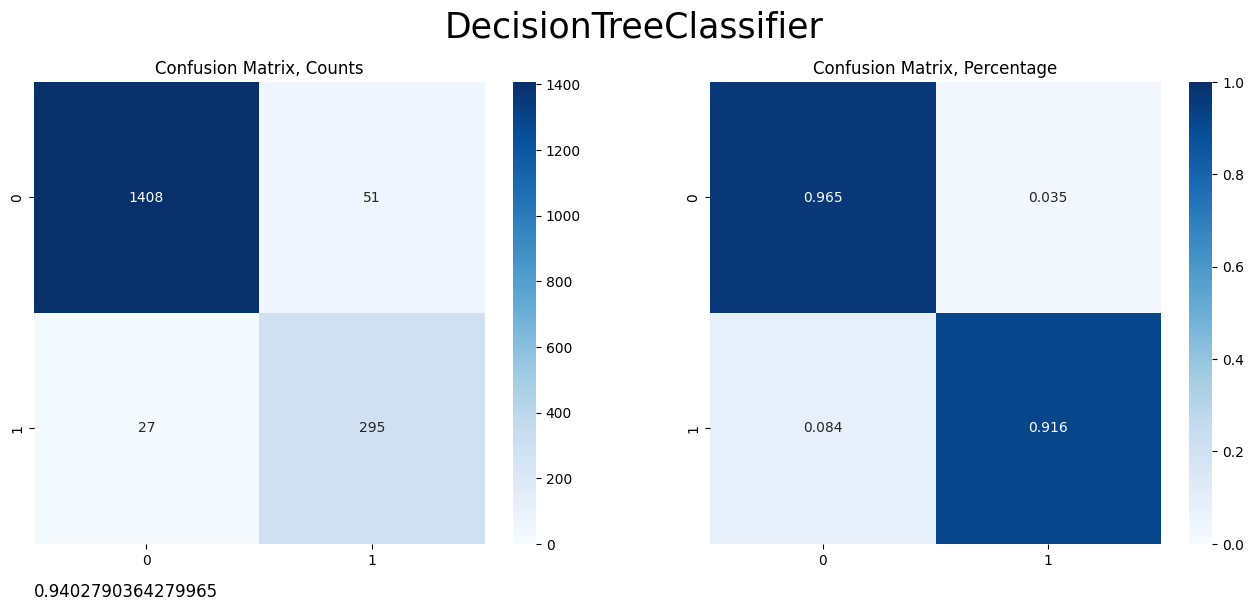

0.9402790364279965


In [114]:
dec_tree = DecisionTreeClassifier(**grid_dec.best_params_)

_, _, _, _ = train_predict_evaluate_save_model(
    dec_tree, 
    X_train, y_train, X_test, y_test,
    params_val="GridSearch", is_smote_val="No",
    model_name="\dec_tree_gs_ns.joblib", folder_name=folder_name
)

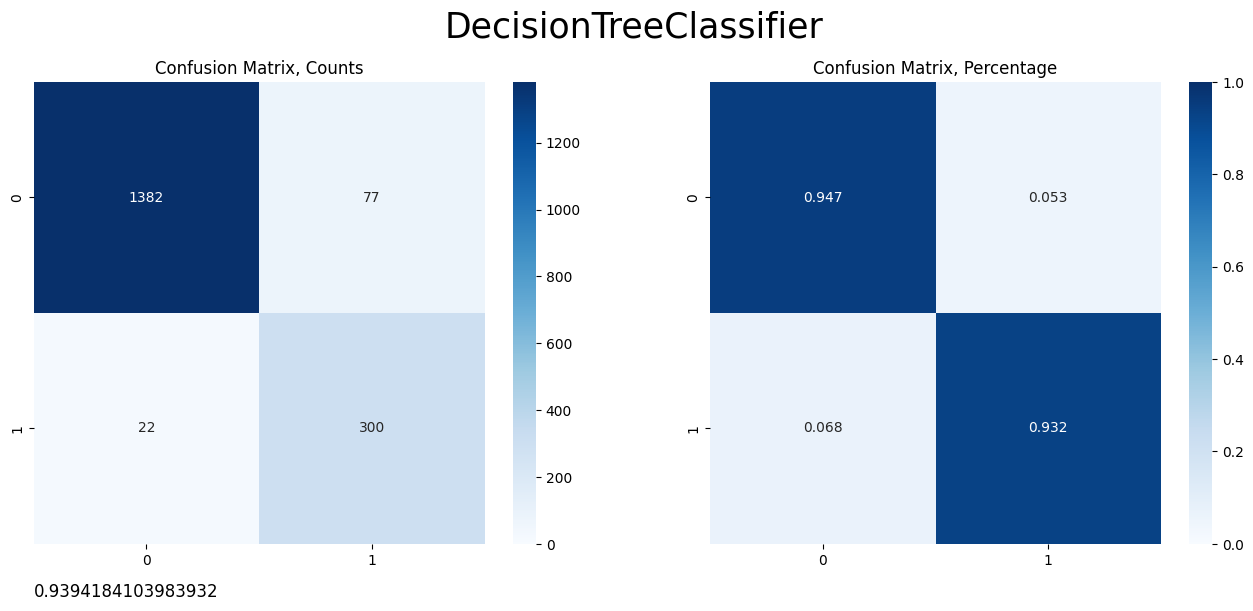

0.9394184103983932


In [115]:
dec_tree = DecisionTreeClassifier(**grid_dec_smote.best_params_)

_, _, _, _ = train_predict_evaluate_save_model(
    dec_tree, 
    X_train_smote, y_train_smote, X_test, y_test,
    params_val="GridSearch", is_smote_val="SMOTE",
    model_name="\dec_tree_gs_smote.joblib", folder_name=folder_name
)

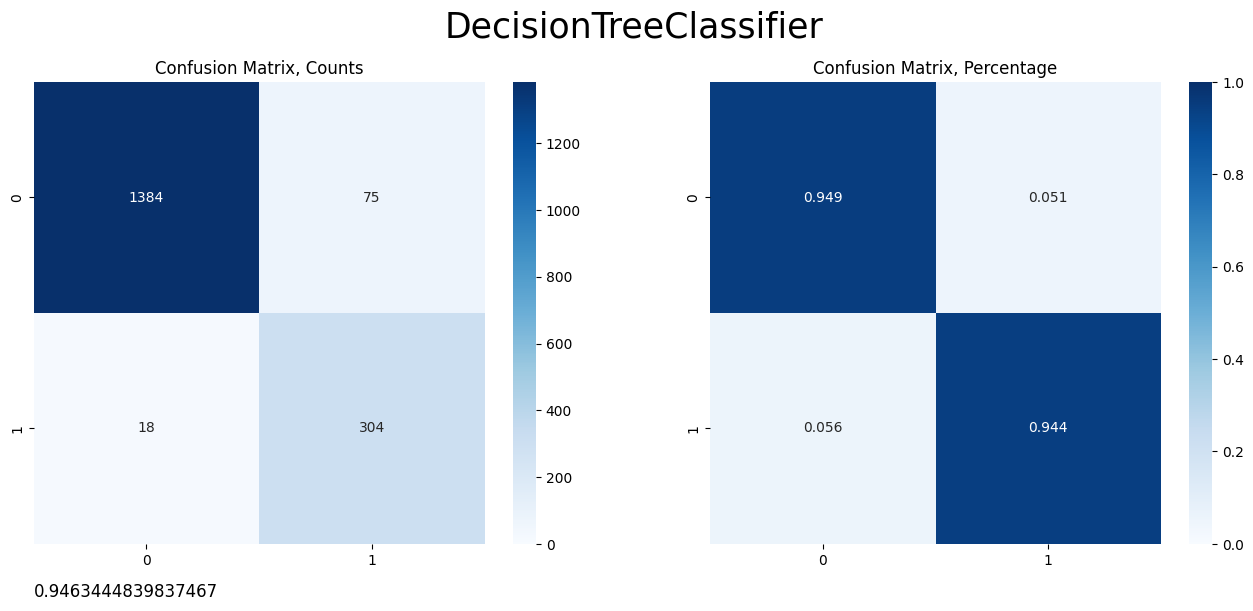

0.9463444839837467


In [116]:
dec_tree = DecisionTreeClassifier(**grid_dec_smote.best_params_)

_, _, _, _ = train_predict_evaluate_save_model(
    dec_tree, 
    X_train_smoteenn, y_train_smoteenn, X_test, y_test,
    params_val="GridSearch", is_smote_val="SMOTEENN",
    model_name="\dec_tree_gs_smoteenn.joblib", folder_name=folder_name
)

## Random Forest
Best Decision Tree params on data with best performance, GridSearch only for n_estimators param

In [117]:
grid_dec_smote.best_params_

{'criterion': 'entropy',
 'max_depth': 9,
 'max_features': 'log2',
 'min_samples_split': 5,
 'splitter': 'best'}

In [118]:
params_grid_rf = {
    key: [value]
    for key, value in grid_dec_smote.best_params_.items()
    if key != 'splitter'
}
params_grid_rf["n_estimators"] = [100, 200, 300, 400, 500]

rf = RandomForestClassifier()

In [119]:
grid_rf_smote = GridSearchCV(estimator=rf, param_grid=params_grid_rf, scoring=g_mean_weighted_scorer)
grid_rf_smote.fit(X_train_smote, y_train_smote)

grid_rf_smote.best_params_

{'criterion': 'entropy',
 'max_depth': 9,
 'max_features': 'log2',
 'min_samples_split': 5,
 'n_estimators': 100}

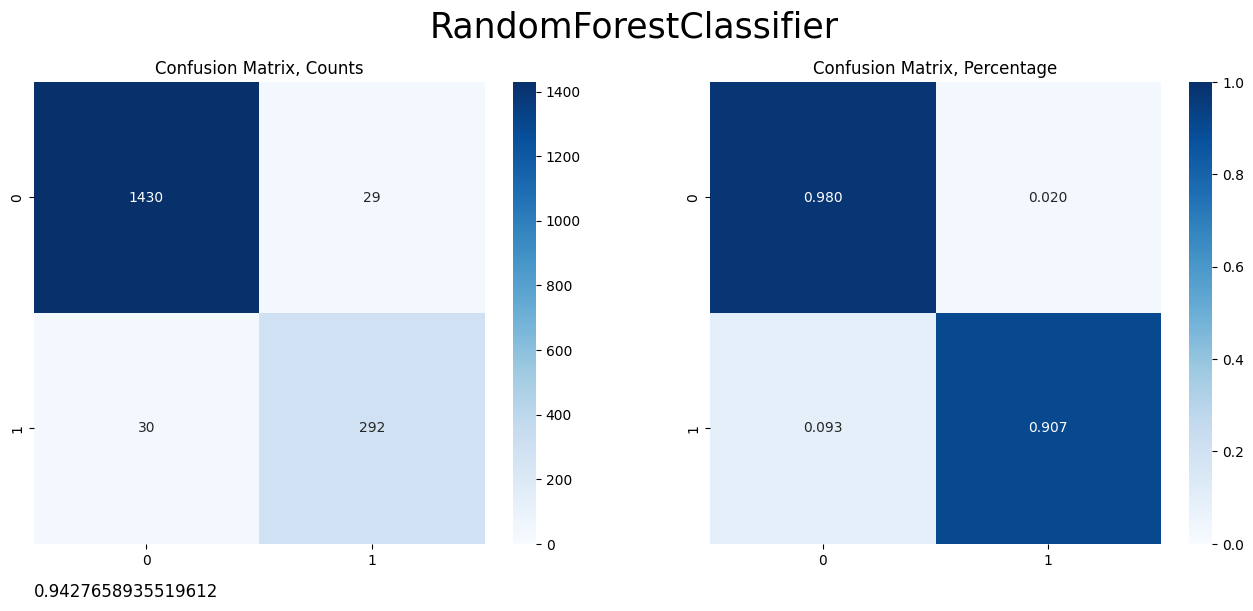

0.9427658935519612


In [120]:
rf = RandomForestClassifier(**grid_rf_smote.best_params_)

_, _, _, _ = train_predict_evaluate_save_model(
    rf, 
    X_train, y_train, X_test, y_test,
    params_val="GridSearch", is_smote_val="SMOTEENN",
    model_name="\Rf_gs_smoteenn.joblib", folder_name=folder_name
)

## Comparison of models

In [124]:
d = dict(
    model=model_names, 
    params=params, 
    geometric_mean=geometric_mean, 
    sensitivity=sensitivity, 
    specificity=specificity, 
    is_smote=is_smote,
    exec_time_in_sec=exec_time
)

d = pd.DataFrame(d)
d = d.sort_values(by=["geometric_mean"], ascending=False)
d = d.drop_duplicates(subset=["model", "params", "is_smote"], keep="first")
d = d.reset_index(drop=True)

comparison = "\model_comparison.csv"
path = folder_name + comparison
if not os.path.exists(path):
    d.to_csv(path)

d

,model,params,geometric_mean,sensitivity,specificity,is_smote,exec_time_in_sec
0,KNeighborsClassifier,GridSearch,0.9556,0.9627,0.9486,SMOTEENN,0.12
1,XGBClassifier,GridSearch,0.9550,0.9410,0.9692,SMOTE,1.07
2,SVC,GridSearch,0.9539,0.9783,0.9301,SMOTE,2.98
3,SVC,GridSearch,0.9539,0.9783,0.9301,SMOTEENN,1.28
4,XGBClassifier,No,0.9536,0.9565,0.9507,SMOTEENN,0.13
5,SVC,GridSearch,0.9521,0.9783,0.9267,No,0.91
6,KNeighborsClassifier,GridSearch,0.9511,0.9441,0.9582,SMOTE,0.15
7,XGBClassifier,GridSearch,0.9493,0.9161,0.9836,No,0.48
8,KNeighborsClassifier,GridSearch,0.9463,0.9130,0.9808,No,0.17
9,DecisionTreeClassifier,GridSearch,0.9463,0.9441,0.9486,SMOTEENN,0.08


## ROC curve

In [122]:
models.sort(key=lambda x: x[1], reverse=True)
ll = []

for model, _ in models[:4]:
    a = metrics.RocCurveDisplay.from_estimator(model, X_test, y_test, )
    ll.append(a.__dict__)
    plt.close()

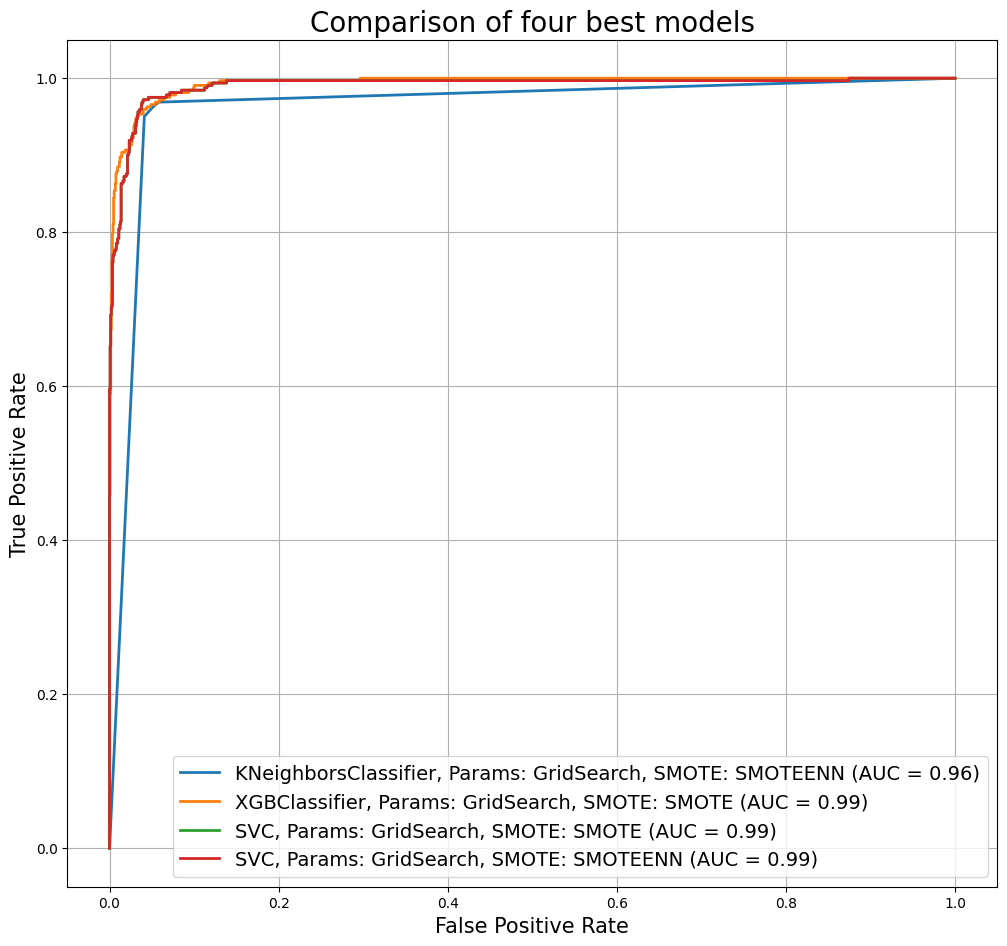

In [127]:
plt.figure(figsize=(12, 11))
for i in range(len(ll)):
    labels = dict(d.loc[i, :])
    label = f"{labels['model']}, Params: {labels['params']}, SMOTE: {labels['is_smote']} (AUC = {ll[i]['roc_auc'].round(2)})"
    plt.plot(ll[i]["fpr"], ll[i]["tpr"], label=label, linewidth=2)

plt.title("Comparison of four best models", fontsize=20)
plt.xlabel("False Positive Rate", fontsize=15)
plt.ylabel("True Positive Rate", fontsize=15)
plt.legend(fontsize=14)
plt.grid()
plt.show()

# Bibliography & links

- https://stackoverflow.com/questions/48340341/how-to-read-csv-to-dataframe-in-google-colab
- https://research.google.com/colaboratory/local-runtimes.html
- https://towardsdatascience.com/detecting-and-treating-outliers-in-python-part-1-4ece5098b755

In [ ]:
# path = 'models_deleted_cols\dec_tree_gs_smoteenn.joblib'
# model = joblib.load(path)
# model